In [138]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from math import sqrt #math
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.tree import export_text
import missingno as msno

#data preprocessing & normalization
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Regression ML algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

#Classificalion ML algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier

#Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

#Time estimation
import time


"First of all, we need to upload our dataset into the variable. The current dataset contains two different files, corresponding to the math exam evaluation and the Portuguese exam evaluation, respectively. Each file has a similar structure."

| Column | Description |
| ---|---|
| school	| student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)|
|sex	 | student's sex (binary: 'F' - female or 'M' - male)|
|age	|student's age (numeric: from 15 to 22)|
|address	|student's home address type (binary: 'U' - urban or 'R' - rural)|
|famsize	|family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)|
|Pstatus	|parent's cohabitation status (binary: 'T' - living together or 'A' - apart)|
|Medu	|mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)|
|Fedu	|father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)|
|Mjob	|mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')|
|Fjob	|father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')|
|reason	|reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')|
|guardian	|student's guardian (nominal: 'mother', 'father' or 'other')|
|traveltime	|home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)|
|studytime	|weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)|
|failures	|number of past class failures (numeric: n if 1<=n<3, else 4)|
|schoolsup	|extra educational support (binary: yes or no)|
|famsup	|family educational support (binary: yes or no)|
|paid	|extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)|
|activities	|extra-curricular activities (binary: yes or no)|
|nursery	|attended nursery school (binary: yes or no)|
|higher	|wants to take higher education (binary: yes or no)|
|internet	|Internet access at home (binary: yes or no)|
|romantic	|with a romantic relationship (binary: yes or no)|
|famrel	|quality of family relationships (numeric: from 1 - very bad to 5 - excellent)|
|freetime	|free time after school (numeric: from 1 - very low to 5 - very high)|
|goout	|going out with friends (numeric: from 1 - very low to 5 - very high)|
|Dalc	|workday alcohol consumption (numeric: from 1 - very low to 5 - very high)|
|Walc	|weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)|
|health	|current health status (numeric: from 1 - very bad to 5 - very good)|
|absences	|number of school absences (numeric: from 0 to 93)|
|G1|First grade|
|G2|Second grade|
|G3|Third grade, based on the G1 and G2|

The main **objective** of conducting exploratory data analysis is to examine the hypothesis that various social factors, particularly alcohol consumption, have an impact on students' grades. Additionally, we aim to predict the class of final grades using the available features. Furthermore, we intend to investigate other hypotheses that may uncover hidden relationships between the features.

1. To ensure that our data is not biased, we need to examine the general gender distribution. By analyzing the dataset, we can determine the proportion of males and females and assess whether there is an equal representation of both genders.

2. We can investigate potential differences between the two schools in various aspects:

    2.1 Attendees: We can compare the number of students attending each school to see if there is a significant difference in enrollment.

    2.2 Academic performance: We can analyze the academic performance of students from each school and assess if there are any noticeable variations between them.

    2.3 Possible reasons: To identify possible reasons for any differences observed, we can consider factors such as parents' education levels, external pressure on students (e.g., outclass pressure), or any other relevant factors that may contribute to performance discrepancies.

3. Instead of measuring "the mean temperature at the hospital", we can compare the overall data dynamics with the performance of different groups based on school distributions. This approach allows us to explore any potential correlations or patterns between academic performance within specific school groups.

4. We can examine whether there is a dependence between the age of students and their performance. The null hypothesis (H0) assumes that younger students perform worse and fail more. By analyzing the data, we can assess whether there is evidence to support or reject this hypothesis.

5. We can investigate whether there is a dependency between students' performances and their study time or free time. The null hypothesis (H0) states that those who study more tend to perform better. By analyzing the data, we can evaluate whether this hypothesis holds true or if there are other factors influencing academic performance.

6. We can explore whether there is a difference in academic performance between children of teachers and those who are not. By comparing the performance data of these two groups, we can determine if there is any noticeable advantage or disadvantage for teachers' children in terms of their grades.

### MATH dataset. EDA

Let's test our hypothesis and assumptions on the Math dataset. We will upload it, using 'read_csv' function from the Pandas library:

In [2]:
math_data = pd.read_csv('Maths.csv')
math_data.head(10)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
2  ...      4        3      2     2     3      3       10   7   8  10  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3      2     1     2      5        4   6  10  10  
5  ...      5        4      2     1     2      5       10  15  15  15  
6  ...      4        4      4     1     1      3        0  12  12  11  
7  ...      4        1      4     1     1      1        6   6   5   6  
8  ...      4        2      2     1     1      1        0  16  18  19  
9  ...      5        5      1     1     1      5        0  14  15  15  

[10 rows x 33 columns]

## Data cleaning and preparation
### General exploration

In [3]:
math_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

On the first sight it seems like the dataset is pretty clear and doesn't contain any missing values. Let's visualise it using missingno library:

<AxesSubplot:>

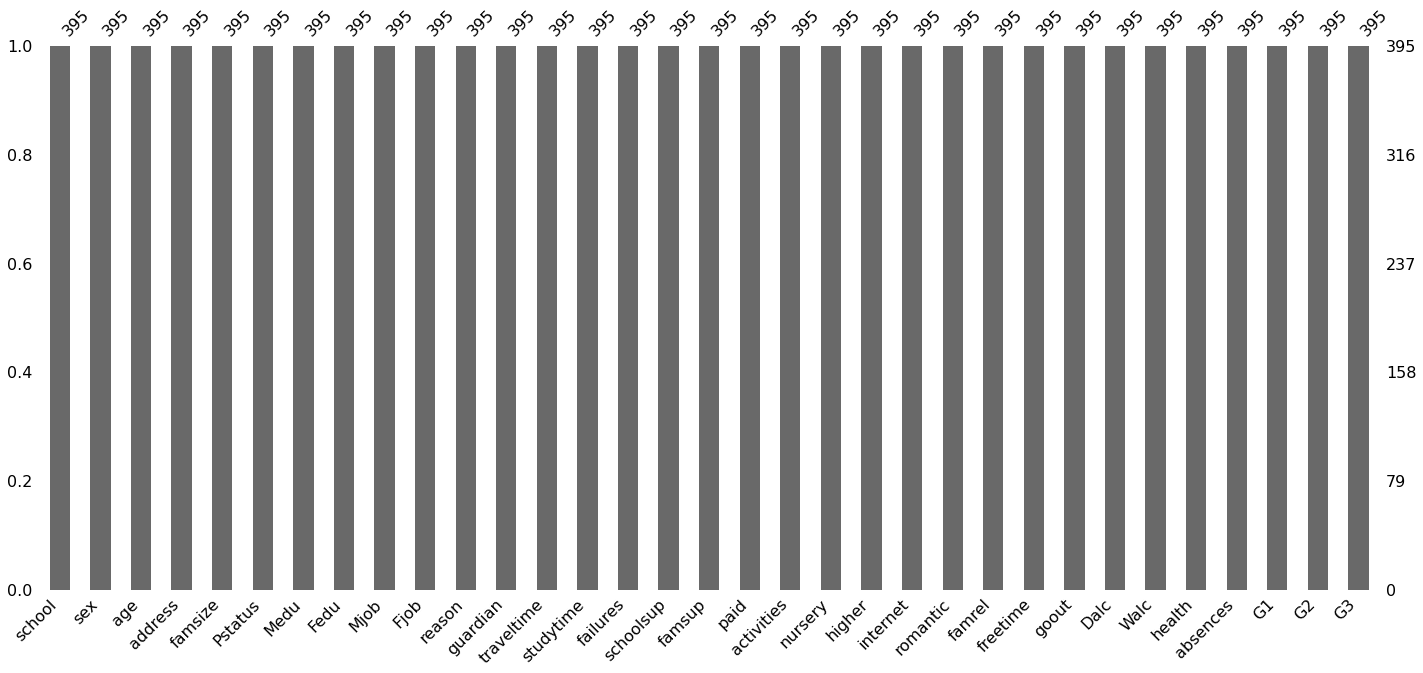

In [5]:
msno.bar(math_data)

Here we can see, that the name of column "reason" does not ring a bell. It should be renamed to be clear understandable from the first sight:

In [7]:
math_data.rename(columns={"reason":"schoolReason"})
math_data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Upon initial inspection, it is evident that the dataset comprises 33 columns. As mentioned earlier, any empty columns were identified and excluded from the analysis. The dataset consists of 395 rows containing data of either 'int' or 'object' type. To gain a better understanding of the dataset and identify potential outliers that could significantly impact model performance evaluations, it is crucial to examine the basic statistics of these columns. This can be achieved by utilizing the **describe()** method, which provides key statistical measures for both numerical and categorical data. Analyzing these statistics helps in detecting outliers and enables subsequent steps for their removal, ensuring accurate model performance assessments.

In [5]:
math_data.describe().style.set_properties(**{"background-color": "#e1dcf5","color":"#5e5e5e"})

Based on the provided summary, it can be concluded that the numerical part of the data appears to be clean without any significant abnormal outliers. The performance values are reasonable and aligned with real-world examples. However, to ensure the overall quality of the dataset, it is necessary to examine the 'object' fields. To accomplish this, you can utilize the same method, **.describe()**, while specifying the **attribute include='object'**. This will allow you to obtain relevant statistics and insights specifically for the 'object' data, enabling a comprehensive evaluation of the dataset.

In [3]:
math_data.describe(include='object').style.set_properties(**{"background-color": "#e1dcf5","color":"#5e5e5e"})

We can also see that our data doesn't contain any extra values in the columns that we've seen.

This overview provides valuable insights at a glance:

* Gabriel Pereira School has approximately seven times more students than Mousinho da Silveira School. Further investigation is needed to determine the underlying reasons for this significant difference in student population.

* The gender distribution appears to be within normal range, as mentioned in p.1.

* The majority of students in the dataset reside in urban areas.

* About half of the students have siblings.

* Most students live with both parents.

* The majority of students do not receive school support. It is worth exploring any possible correlation between the lack of school support and other factors related to the school.

* A significant portion of the students express a desire to pursue higher education.

* The majority of students have internet access.

* Approximately half of the students are involved in romantic relationships.

To visualize the school and gender distribution, we can utilize the funnel plot from the plotly.express module.

2. ### Biases checking

In [8]:
school_math_data = pd.DataFrame(math_data.groupby(['school','sex']).count()).reset_index()
school_math_data = school_math_data[['school','sex','age']]
school_math_data.columns = ['school','gender','number']
school_math_data

school gender  number
0     GP      F     183
1     GP      M     166
2     MS      F      25
3     MS      M      21

In [9]:
fig = px.funnel(school_math_data, x='number', y='school', color='gender', title = "Gender distribution per school", color_discrete_map = {'C1': '#c1dff7', 'C2': '#e4c1f7'})
fig.show()

The next interesting thing to check will be the age distribution per school and per gender. For that, we'll need to regroup our dataset in the following structure: 

In [10]:
gp_school_math_data = math_data[math_data['school']=='GP'].groupby(['sex','age']).count().reset_index()
gp_school_math_data = gp_school_math_data[['sex','age','address']]
gp_school_math_data.columns = ['gender', 'age', 'number']
gp_school_math_data

gender  age  number
0       F   15      38
1       F   16      54
2       F   17      50
3       F   18      29
4       F   19      12
5       M   15      44
6       M   16      50
7       M   17      36
8       M   18      28
9       M   19       6
10      M   20       1
11      M   22       1

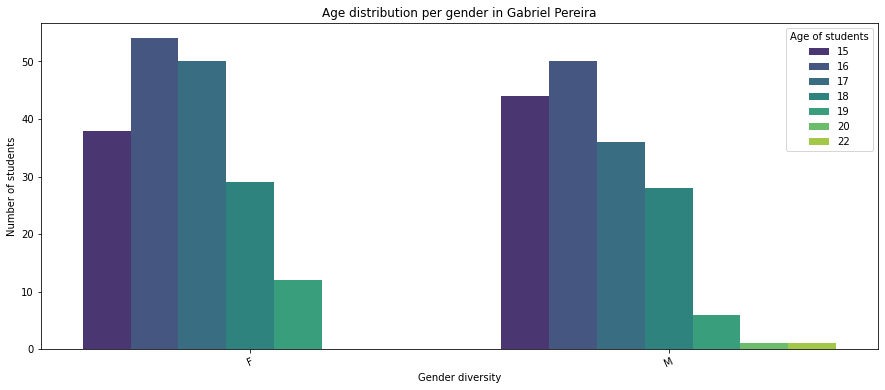

In [20]:
fig, ax = plt.subplots(figsize = (15, 6))
ax = sns.barplot(x="gender", y="number", hue="age", data=gp_school_math_data , palette = 'viridis')
ax.set_title("Age distribution per gender in Gabriel Pereira")
ax.set_ylabel("Number of students")
ax.set_xlabel("Gender diversity")
ax.legend(title='Age of students')
plt.xticks(rotation=25)
plt.show()

It seems like Gabriel Pereira has quite normal distribution with some rare outliers in male group. We'll do the same for another school.

In [21]:
ms_school_math_data = math_data[math_data['school']=='MS'].groupby(['sex','age']).count().reset_index()
ms_school_math_data  = ms_school_math_data [['sex','age','address']]
ms_school_math_data.columns = ['gender', 'age', 'number']
ms_school_math_data 

gender  age  number
0      F   17       8
1      F   18      14
2      F   19       2
3      F   20       1
4      M   17       4
5      M   18      11
6      M   19       4
7      M   20       1
8      M   21       1

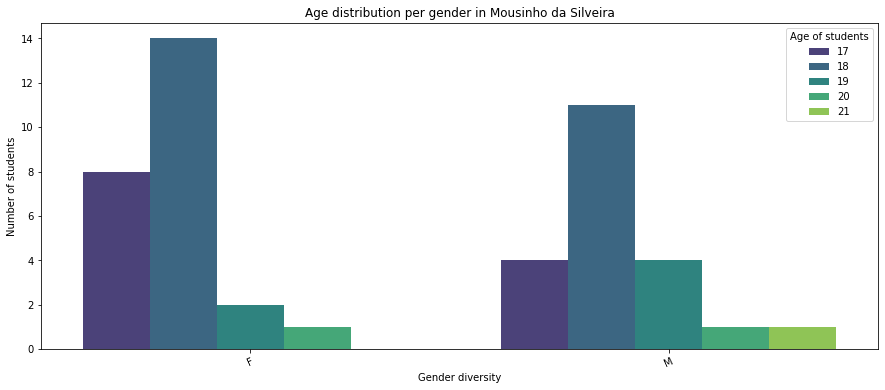

In [22]:
fig, ax = plt.subplots(figsize = (15, 6))
ax = sns.barplot(x="gender", y="number", hue="age", data=ms_school_math_data , palette = 'viridis')
ax.set_title("Age distribution per gender in Mousinho da Silveira")
ax.set_ylabel("Number of students")
ax.set_xlabel("Gender diversity")
ax.legend(title='Age of students')
plt.xticks(rotation=25)
plt.show()


Indeed, the differences in minimum and mean values based on the schools' characteristics are intriguing. It suggests that there are core distinctions between the schools, which can be attributed to factors such as the number of attendees and their age. To gain deeper insights, it would be valuable to investigate the reasons behind these differences. 

Let's try the explore the average level of grades for different schools first.

In [23]:
gp_school_math_data_marks = math_data[math_data['school']=='GP']

In [24]:
gp_school_math_data_marks.describe().style.set_properties(**{"background-color": "#e1dcf5","color":"#5e5e5e"})

In [35]:
gp_school_math_data_marks["count"] = 1
gp_school_math_data_marks_v2 = gp_school_math_data_marks[["G3", "count"]].groupby(["G3"]).count().reset_index()

Text(0.5, 0, 'Final score')

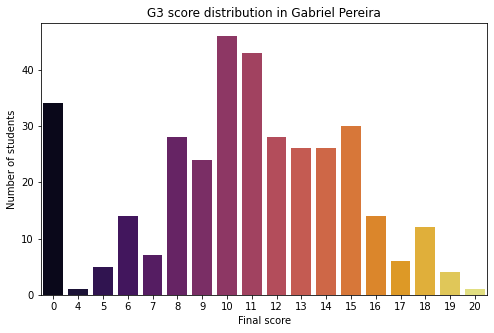

In [47]:
fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.barplot(x="G3", y="count", data=gp_school_math_data_marks_v2, palette = 'inferno')
ax.set_title("G3 score distribution in Gabriel Pereira")
ax.set_ylabel("Number of students")
ax.set_xlabel("Final score")

It does look like a normal distribution, except for those who failed the course. Let's check the other school: 

In [25]:
ms_school_math_data_marks = math_data[math_data['school']=='MS']

In [26]:
ms_school_math_data_marks.describe().style.set_properties(**{"background-color": "#e1dcf5","color":"#5e5e5e"})

In [38]:
ms_school_math_data_marks["count"] = 1
ms_school_math_data_marks_v2 = ms_school_math_data_marks[["G3", "count"]].groupby(["G3"]).count().reset_index()

Text(0.5, 0, 'Final score')

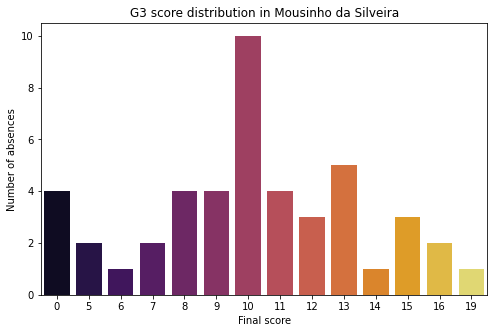

In [52]:
fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.barplot(x="G3", y="count", data=ms_school_math_data_marks_v2, palette = 'inferno') 
ax.set_title("G3 score distribution in Mousinho da Silveira")
ax.set_ylabel("Number of absences")
ax.set_xlabel("Final score")

By comparing the two, it appears that the distribution of grades follows a relatively normal pattern, and the difference in grades between the schools does not appear to be substantial. In the next step, we will analyze whether there is a disparity in the mean number of absences.

We will try to vizualize this data to see the more complex picture. We will take G3 as our x axis because it referres to the final grade, that combines the results of G1 and G2.

Text(0.5, 0, 'Final score')

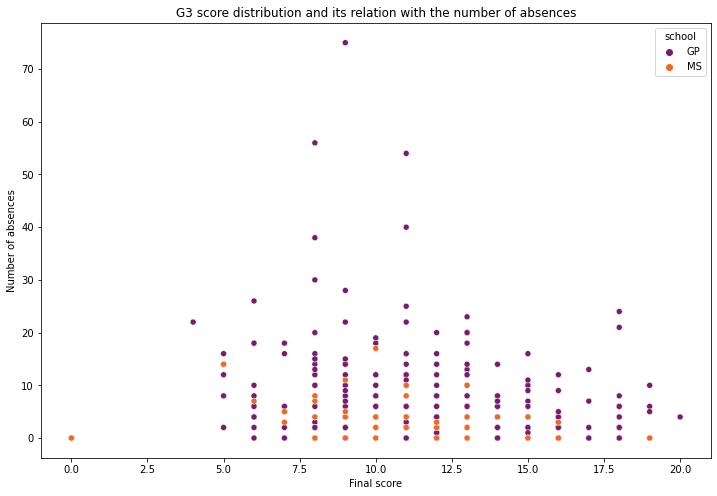

In [51]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(data=math_data, x="G3", y="absences", hue = 'school', palette = 'inferno')
ax.set_title("G3 score distribution and its relation with the number of absences")
ax.set_ylabel("Number of absences")
ax.set_xlabel("Final score")

Indeed, it is evident that the average number of absences in Gabriel Pereira School is higher. However, considering the significant difference in the number of students between the two schools, it would be premature to draw conclusions based solely on this single feature. To form a more robust hypothesis, it is necessary to explore additional factors.

One such factor to consider is the percentage of total failures per school.

Text(0.5, 0, 'Final score')

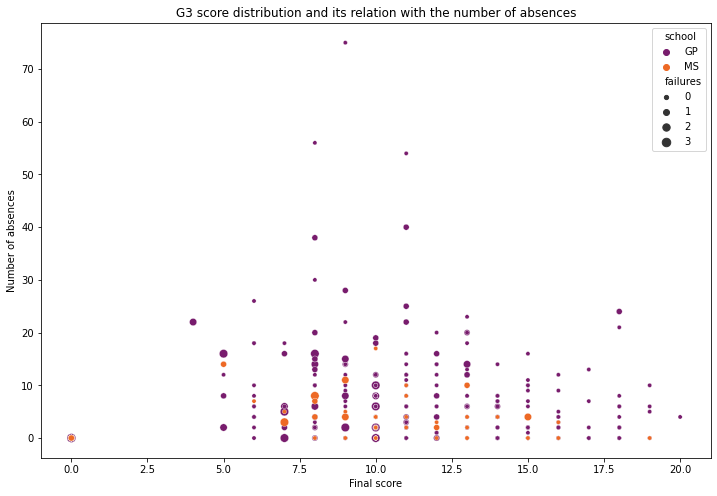

In [50]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(data=math_data, x="G3", y="absences", hue = 'school', size="failures", palette = 'inferno')
ax.set_title("G3 score distribution and its relation with the number of absences")
ax.set_ylabel("Number of absences")
ax.set_xlabel("Final score")

Based on the calculations and analysis of the relative numbers of failures, it can be concluded that there is no significant difference between the number of failures in the two schools. Despite Gabriel Pereira School having a student with a high number of absences, it is noteworthy that this student did not experience any failures and achieved a relatively average score. However, a notable observation is that Mousinho da Silveira School does not exhibit extreme outliers in terms of the number of absences when compared to Gabriel Pereira School. These findings suggest that while absences may vary between the schools, it does not appear to have a substantial impact on the overall failure rates.

### Correlation analysis

First, let's see what general correlation analysis of the dataset overall can show us. 

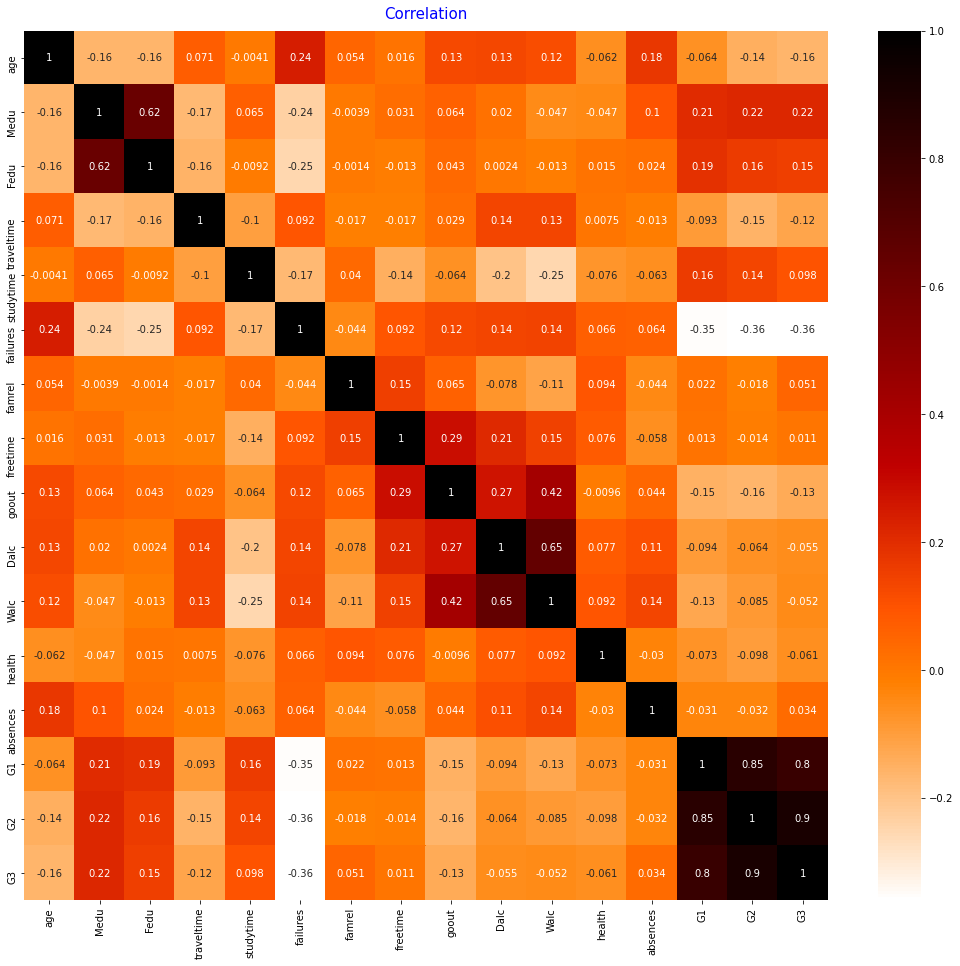

In [53]:
plt.figure(figsize = (18,16))
sns.heatmap(math_data.corr(), annot = True, cmap = 'gist_heat_r')
plt.title("Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()


Apart from the correlation between the final score and the G1 and G2 marks, there are two notable measurable correlations that can be distinguished:

* The level of parents' education: There is a correlation between the level of parents' education and students' academic performance. 

* Weekday alcohol consumption and working day alcohol consumption: There is a correlation between the amount of alcohol consumed on weekdays and working days.

Additionally, as a bonus, it is worth mentioning the possible interdependence between going out and weekend alcohol consumption. This relationship could be interesting to explore further to understand if there is a connection between students' social activities, such as going out, and their alcohol consumption patterns on weekends.

To conduct a similar analysis but with the separation of schools, we can follow the same steps as before but consider the data for each school separately. This will allow us to identify any distinct correlations or patterns that may be specific to each school and provide deeper insights into the relationships between different variables.

In [54]:
gp_school_math_data_marks_and_age = math_data[math_data['school']=='GP']

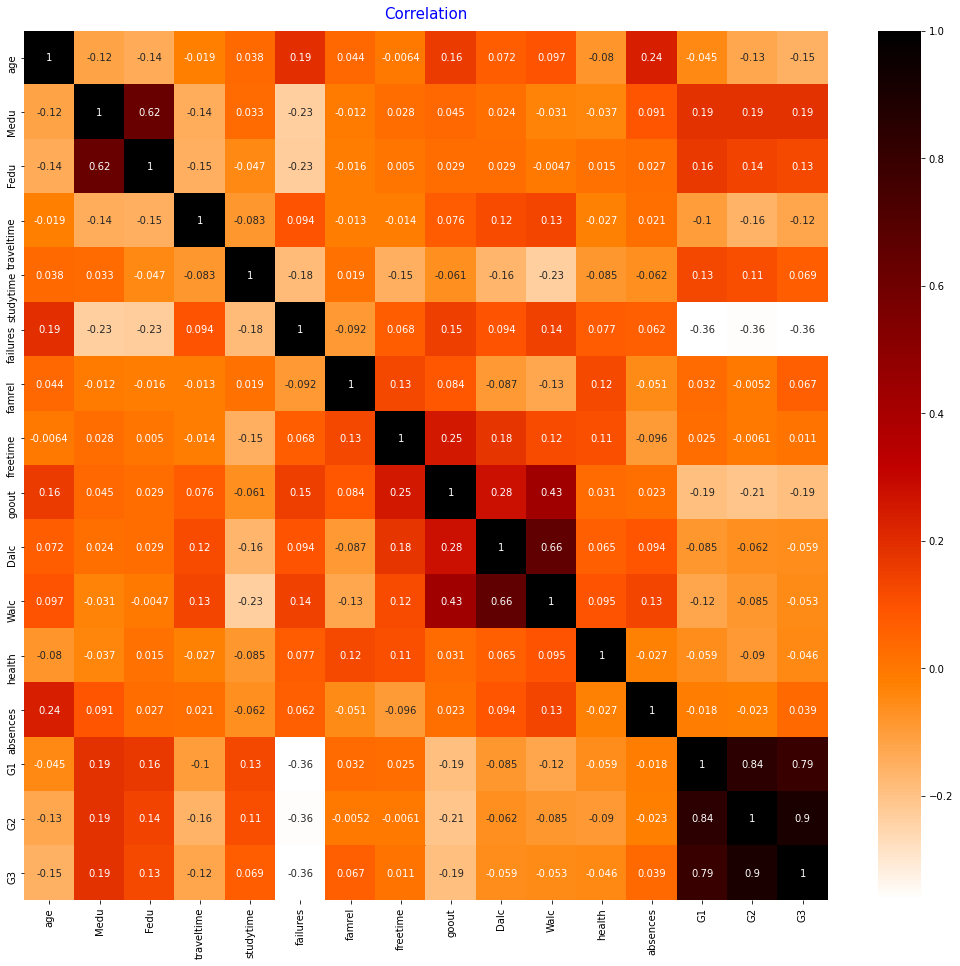

In [55]:
plt.figure(figsize = (18,16))
sns.heatmap(gp_school_math_data_marks_and_age.corr(), annot = True, cmap = 'gist_heat_r')
plt.title("Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

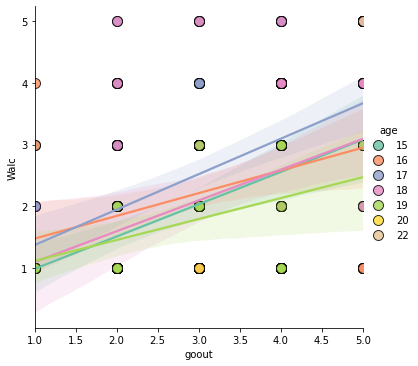

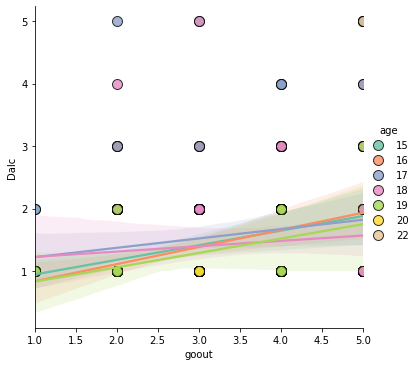

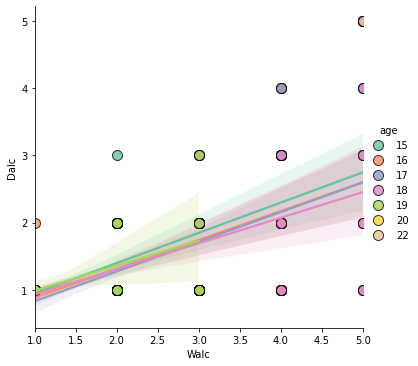

In [56]:
ax1 = sns.lmplot(
    x="goout", 
    y="Walc", 
    hue="age", 
    data=gp_school_math_data_marks_and_age, 
    palette="Set2", 
    scatter_kws = {'s':100, 'edgecolor': 'black'})

ax2 = sns.lmplot(
    x="goout", 
    y="Dalc", 
    hue="age", 
    data=gp_school_math_data_marks_and_age, 
    palette="Set2", 
    scatter_kws = {'s':100, 'edgecolor': 'black'})

ax3 = sns.lmplot(
    x="Walc", 
    y="Dalc", 
    hue="age", 
    data=gp_school_math_data_marks_and_age, 
    palette="Set2", 
    scatter_kws = {'s':100, 'edgecolor': 'black'})

Based on the observations from the three graphs above, it can be concluded that:

 * There is a weak correlation between workday alcohol consumption and the frequency of going out with friends. This suggests that individuals who consume alcohol during workdays may have a slightly higher likelihood of going out with friends.

 * Workday alcohol consumption is linked to weekend alcohol consumption. This indicates that individuals who consume alcohol on workdays are more likely to continue drinking during weekends.

 * Going out with friends is highly correlated with weekend alcohol consumption. People who engage in social activities, such as going out with friends, during weekends have a higher probability of consuming higher amounts of alcohol.

Taken together, these findings suggest that there is a connection between social behavior, alcohol consumption during workdays, and alcohol consumption during weekends. Individuals who engage in social activities and consume alcohol during workdays are more likely to have higher levels of alcohol consumption during weekends. These correlations highlight the interplay between social factors and alcohol consumption patterns.

In [58]:
ms_school_math_data_marks_and_age = math_data[math_data['school']=='MS']

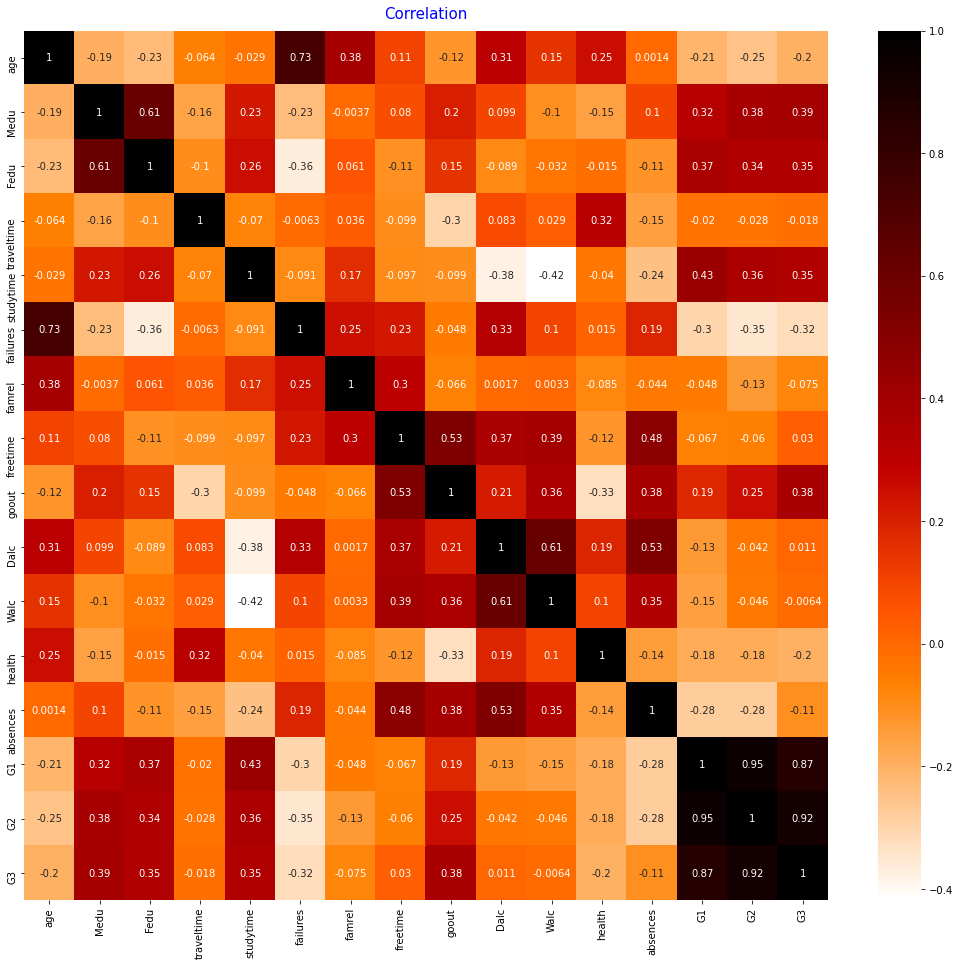

In [59]:
plt.figure(figsize = (18,16))
sns.heatmap(ms_school_math_data_marks_and_age.corr(), annot = True, cmap = 'gist_heat_r')
plt.title("Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

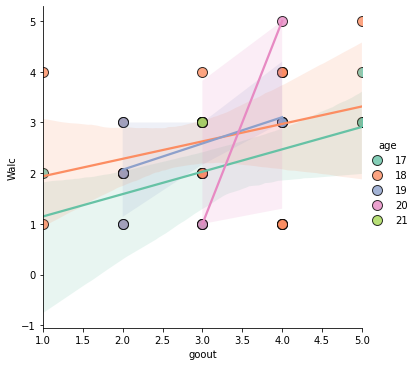

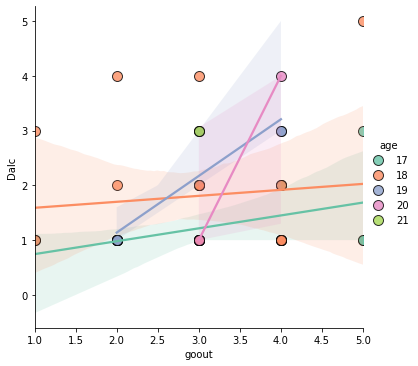

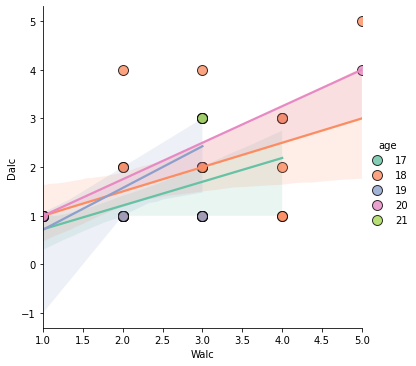

In [60]:
ax2 = sns.lmplot(
    x = "goout", 
    y = "Walc", 
    hue = "age", 
    palette="Set2", 
    data = ms_school_math_data_marks_and_age, 
    scatter_kws = {'s':100, 'edgecolor': 'black'})

ax3 = sns.lmplot(
    x = "goout", 
    y = "Dalc", 
    hue = "age", 
    palette="Set2", 
    data = ms_school_math_data_marks_and_age, 
    scatter_kws = {'s':100, 'edgecolor': 'black'})

ax3 = sns.lmplot(
    x="Walc", 
    y="Dalc", 
    hue="age", 
    data=ms_school_math_data_marks_and_age, 
    palette="Set2", 
    scatter_kws = {'s':100, 'edgecolor': 'black'})

Here we can see the same dependances as for GP school. 

As we discovered during the correlation analysis, there is a high correlation between the number of failures and certain factors. Now, let's examine the distribution of failures per age group specifically within Mousinho da Silveira School.

In [62]:
ms_school_math_data_marks_and_age = ms_school_math_data_marks_and_age[ms_school_math_data_marks_and_age['failures']!=0]
ms_school_math_data_marks_and_age['counter'] = 1
ms_school_math_data_marks_and_age_slice = pd.DataFrame(ms_school_math_data_marks_and_age[['age', 'failures', 'counter']].groupby(['failures', 'age']).count().reset_index())
ms_school_math_data_marks_and_age_slice

failures  age  counter
0         1   17        1
1         1   18        5
2         1   19        3
3         2   19        1
4         2   20        2
5         3   19        1
6         3   21        1

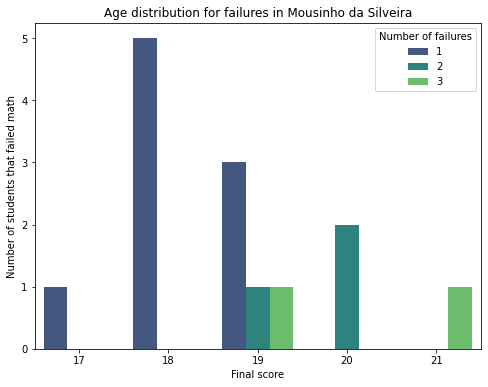

In [71]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.barplot(x=ms_school_math_data_marks_and_age_slice.age, y=ms_school_math_data_marks_and_age_slice.counter, hue=ms_school_math_data_marks_and_age_slice.failures, palette = 'viridis')
ax.set_title("Age distribution for failures in Mousinho da Silveira")
ax.set_ylabel("Number of students that failed math")
ax.set_xlabel("Final score")
ax.legend(title='Number of failures', loc = "upper right")

In Mousinho da Silveira School, there is a noticeable trend where the number of failures tends to increase as students get older. This observation could be associated with a potential lack of motivation as students grow older, potentially stemming from having more opportunities or alternative ideas about what they could pursue instead of focusing on their academic performance.

In [72]:
gp_school_math_data_marks_and_age = gp_school_math_data_marks_and_age[gp_school_math_data_marks_and_age['failures']!=0]
gp_school_math_data_marks_and_age['counter'] = 1

In [73]:
gp_school_math_data_marks_and_age_slice = pd.DataFrame(gp_school_math_data_marks_and_age[['age', 'failures', 'counter']].groupby(['failures', 'age']).count().reset_index())

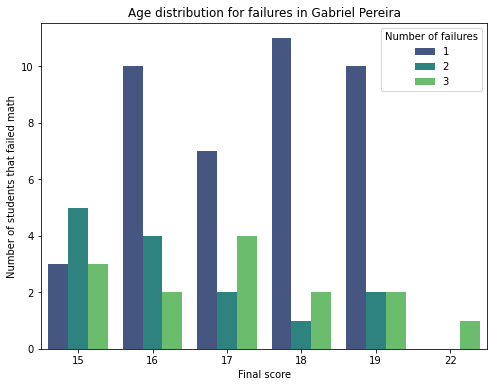

In [74]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.barplot(x=gp_school_math_data_marks_and_age_slice.age, y=gp_school_math_data_marks_and_age_slice.counter, hue=gp_school_math_data_marks_and_age_slice.failures, palette = 'viridis')
ax.set_title("Age distribution for failures in Gabriel Pereira")
ax.set_ylabel("Number of students that failed math")
ax.set_xlabel("Final score")
ax.legend(title='Number of failures', loc = "upper right")

This graph illustrates that students, regardless of their age, tend to have a higher likelihood of failing once, while the number of students failing two or more times decreases.

What is intriguing about this analysis is that it contrasts with the observed trends in Mousinho da Silveira School. The age range is less broader, and the distribution aligns more closely with what one would expect from an unbiased distribution: more students failing once and fewer failing multiple times.

The disparity between the two schools' distributions could potentially be attributed to factors such as the students' social background, differences in educational techniques employed, or other influences discussed earlier. Unfortunately, without further information, it is challenging to determine the exact cause.

### PORTUGUESE dataset. EDA

Let's now run the same analysis on the other course, Portuguese.

In [76]:
portuguese_data = pd.read_csv('Portuguese.csv')
portuguese_data.rename(columns={"reason":"schoolReason"})
portuguese_data.head(10)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        4   0  11  11  
1  ...      5        3      3     1     1      3        2   9  11  11  
2  ...      4        3      2     2     3      3        6  12  13  12  
3  ...      3        2      2     1     1      5        0  14  14  14  
4  ...      4        3      2     1     2      5        0  11  13  13  
5  ...      5        4      2     1     2      5        6  12  12  13  
6  ...      4        4      4     1     1      3        0  13  12  13  
7  ...      4        1      4     1     1      1        2  10  13  13  
8  ...      4        2      2     1     1      1        0  15  16  17  
9  ...      5        5      1     1     1      5        0  12  12  13  

[10 rows x 33 columns]

In [77]:
portuguese_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

As we can see, we have the exact same columns in `portuguese_data` and `math_data`. And still - no noticable missing values.

<AxesSubplot:>

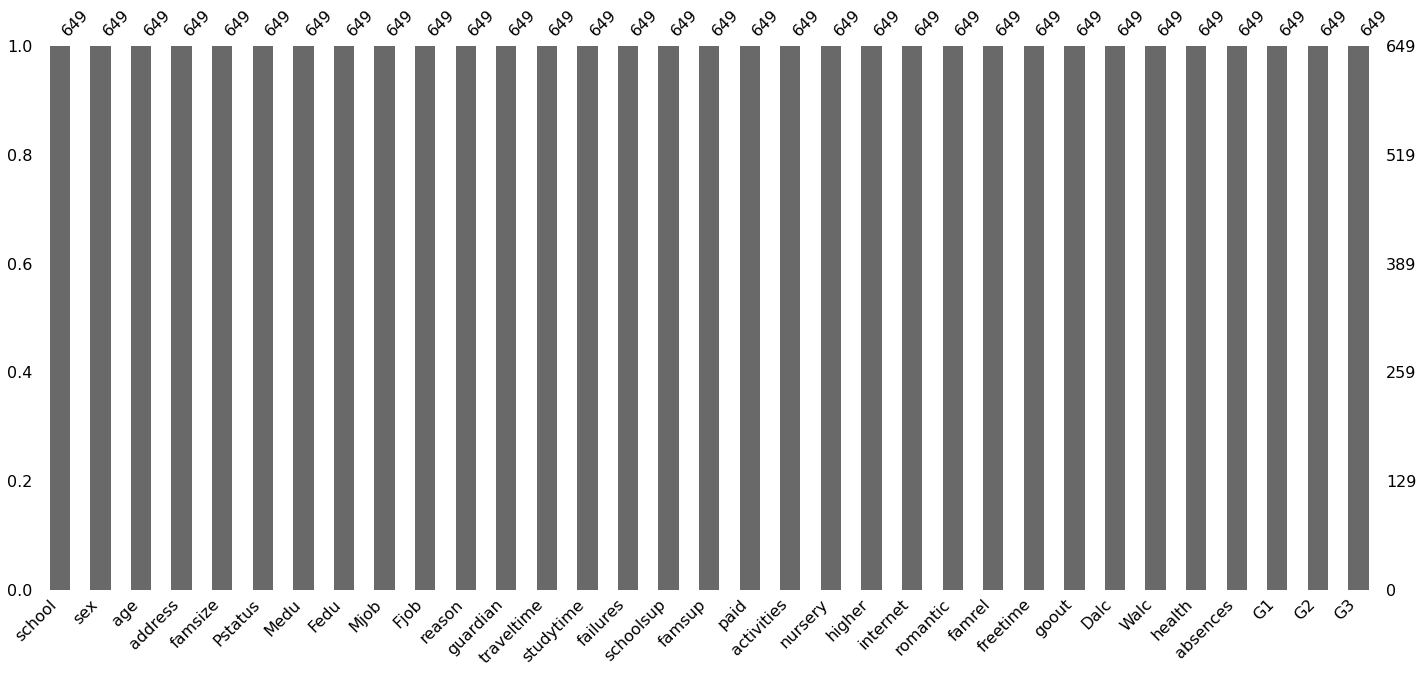

In [78]:
msno.bar(portuguese_data)

In [79]:
portuguese_data.describe().style.set_properties(**{"background-color": "#e1dcf5","color":"#5e5e5e"})

In [80]:
portuguese_data.describe(include='object').style.set_properties(**{"background-color": "#e1dcf5","color":"#5e5e5e"})

We don't have any outliers here. Same comment and conclusion as the math dataset.

In [81]:
school_portuguese_data = pd.DataFrame(portuguese_data.groupby(['school','sex']).count()).reset_index()
school_portuguese_data = school_portuguese_data[['school','sex','age']]
school_portuguese_data.columns = ['school','gender','number']
school_portuguese_data

school gender  number
0     GP      F     237
1     GP      M     186
2     MS      F     146
3     MS      M      80

The gender repartition is sharper in portuguese class, but we still find more female than male student.

In [84]:
fig = px.funnel(school_portuguese_data, x='number', y='school', color='gender', title = "Gender distribution per school", color_discrete_map = {'C1': '#c1dff7', 'C2': '#e4c1f7'})
fig.show()

We can note that we have overall more students in portuguese class than in math class, which is not something surprasing, but still noticable. 

In [85]:
gp_school_portuguese_data = portuguese_data[portuguese_data['school']=='GP'].groupby(['sex','age']).count().reset_index()
gp_school_portuguese_data = gp_school_portuguese_data[['sex','age','address']]
gp_school_portuguese_data.columns = ['gender', 'age', 'number']
gp_school_portuguese_data

gender  age  number
0       F   15      42
1       F   16      59
2       F   17      74
3       F   18      48
4       F   19      10
5       F   20       3
6       F   21       1
7       M   15      44
8       M   16      53
9       M   17      43
10      M   18      36
11      M   19       7
12      M   20       1
13      M   21       1
14      M   22       1

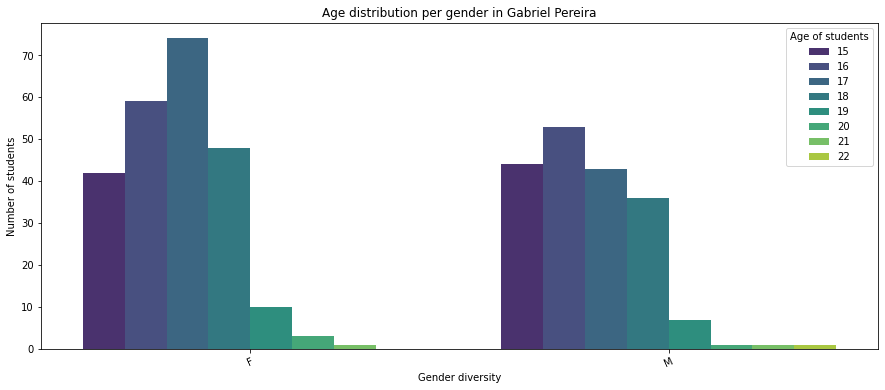

In [86]:
fig, ax = plt.subplots(figsize = (15, 6))
ax = sns.barplot(x="gender", y="number", hue="age", data=gp_school_portuguese_data , palette = 'viridis')
ax.set_title("Age distribution per gender in Gabriel Pereira")
ax.set_ylabel("Number of students")
ax.set_xlabel("Gender diversity")
ax.legend(title='Age of students')
plt.xticks(rotation=25)
plt.show()

The age distribution is very similar in the math class of Gabriel Pereira.

In [87]:
ms_school_portuguese_data = portuguese_data[portuguese_data['school']=='MS'].groupby(['sex','age']).count().reset_index()
ms_school_portuguese_data  = ms_school_portuguese_data [['sex','age','address']]
ms_school_portuguese_data.columns = ['gender', 'age', 'number']
ms_school_portuguese_data

gender  age  number
0       F   15      15
1       F   16      46
2       F   17      39
3       F   18      36
4       F   19       9
5       F   20       1
6       M   15      11
7       M   16      19
8       M   17      23
9       M   18      20
10      M   19       6
11      M   20       1

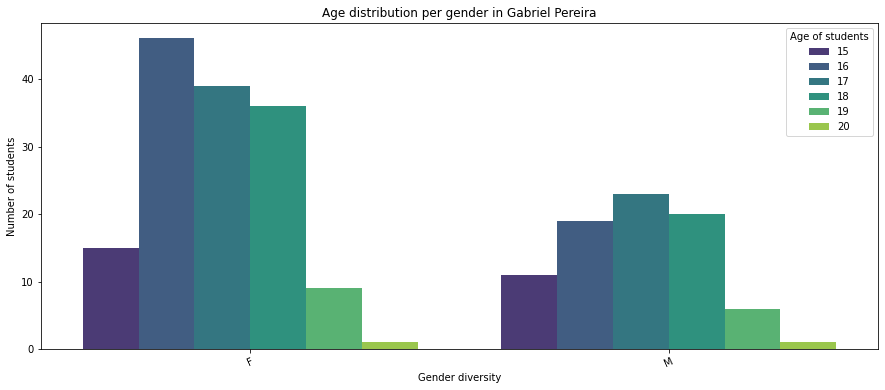

In [88]:
fig, ax = plt.subplots(figsize = (15, 6))
ax = sns.barplot(x="gender", y="number", hue="age", data=ms_school_portuguese_data , palette = 'viridis')
ax.set_title("Age distribution per gender in Gabriel Pereira")
ax.set_ylabel("Number of students")
ax.set_xlabel("Gender diversity")
ax.legend(title='Age of students')
plt.xticks(rotation=25)
plt.show()

As we have more students in Mousinho da Silveira, we observe better bell curves in portuguese class than in math class.

In [89]:
gp_school_portuguese_data_marks = portuguese_data[portuguese_data['school']=='GP']

In [90]:
gp_school_portuguese_data_marks.describe().style.set_properties(**{"background-color": "#e1dcf5","color":"#5e5e5e"})

In [91]:
ms_school_portuguese_data_marks = portuguese_data[portuguese_data['school']=='MS']

In [92]:
ms_school_portuguese_data_marks.describe().style.set_properties(**{"background-color": "#e1dcf5","color":"#5e5e5e"})

Nothing remarkable here, compare to the math dataset. For the note refference, please look at the EDA of math dataset section.

Text(0.5, 0, 'Final score')

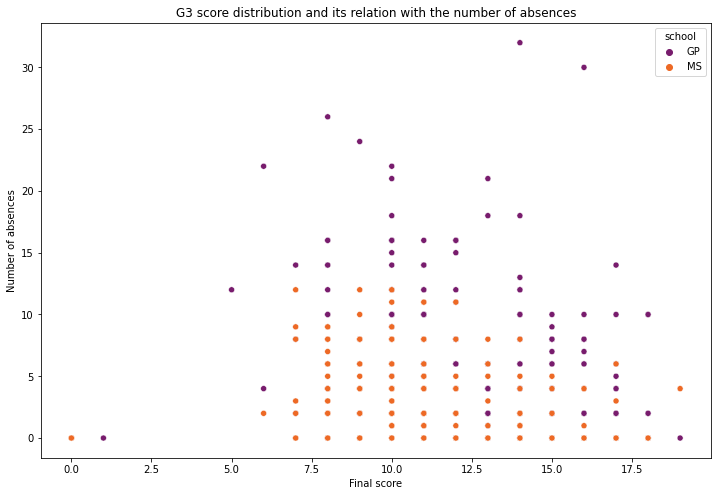

In [93]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(data=portuguese_data, x="G3", y="absences", hue = 'school', palette = 'inferno')
ax.set_title("G3 score distribution and its relation with the number of absences")
ax.set_ylabel("Number of absences")
ax.set_xlabel("Final score")

Generally, we have less extremes values in absences, and the grades are closer to the center than in math class (lower sigma value in portuguese than in math).

Text(0.5, 0, 'Final score')

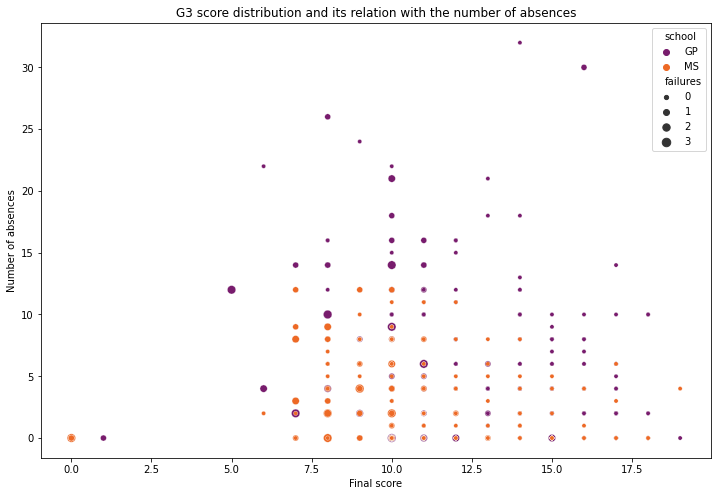

In [94]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(data=portuguese_data, x="G3", y="absences", hue = 'school', size="failures", palette = 'inferno')
ax.set_title("G3 score distribution and its relation with the number of absences")
ax.set_ylabel("Number of absences")
ax.set_xlabel("Final score")

With this visualization, we can say that the student from Gabriel Pereira are more absent than their counterparts in Mousinho da Silveira. However, this delta of absences doensn't seems to impact the mark repartition.

### Correlation matrix

As for the math dataset, first of all, we will explore the general interdependencies.

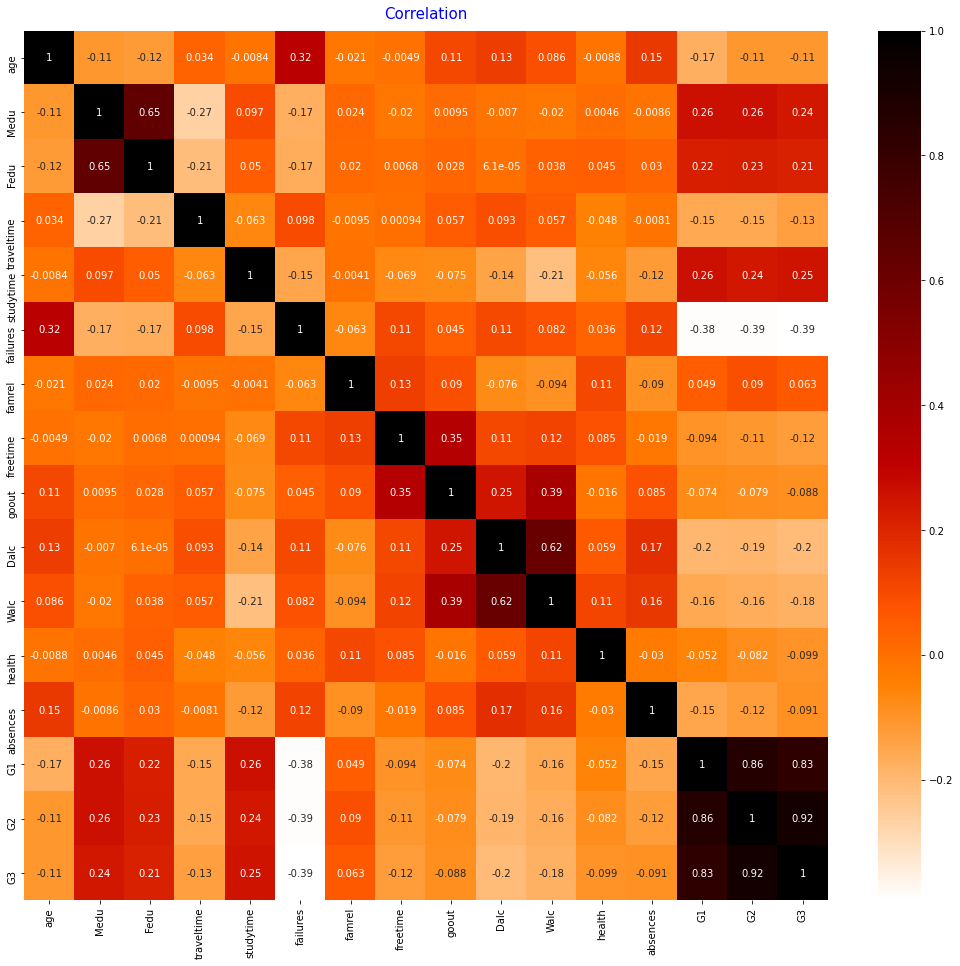

In [95]:
plt.figure(figsize = (18,16))
sns.heatmap(portuguese_data.corr(), annot = True, cmap = 'gist_heat_r')
plt.title("Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

In [97]:
gp_school_portuguese_data_marks_and_age = portuguese_data[portuguese_data['school']=='GP']

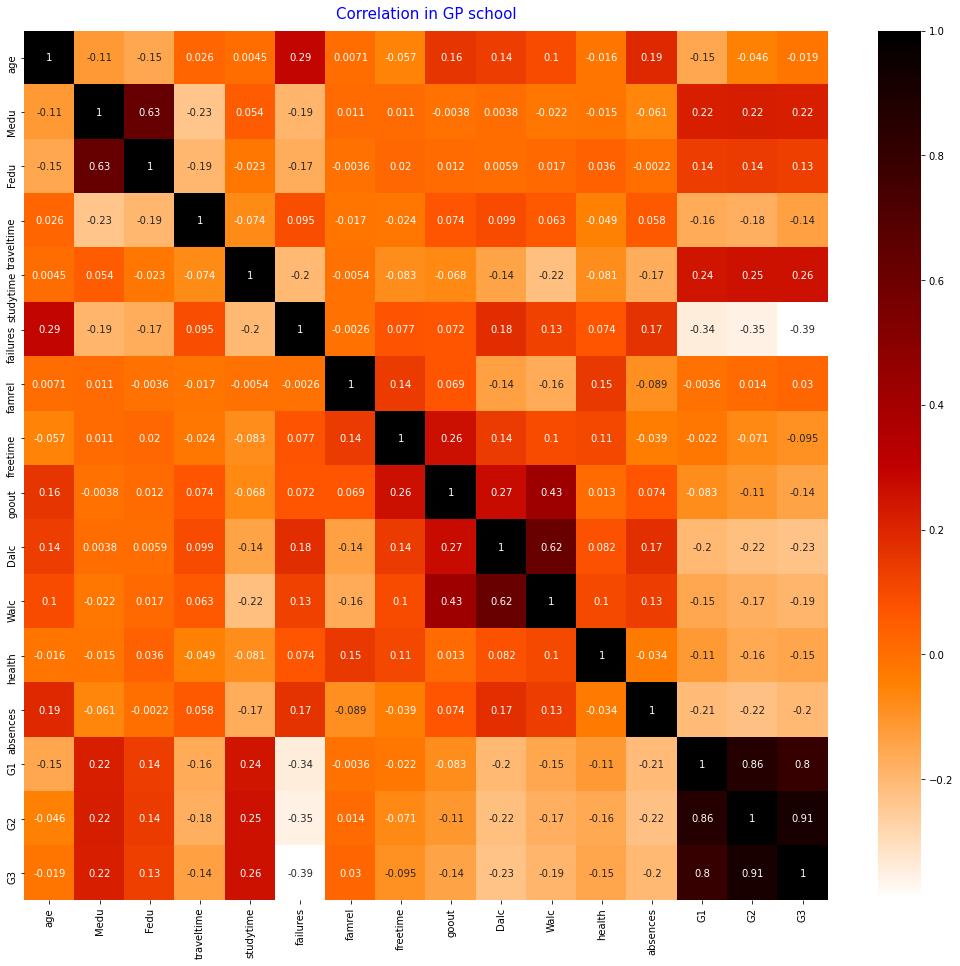

In [99]:
plt.figure(figsize = (18,16))
sns.heatmap(gp_school_portuguese_data_marks_and_age.corr(), annot = True, cmap = 'gist_heat_r')
plt.title("Correlation in GP school", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

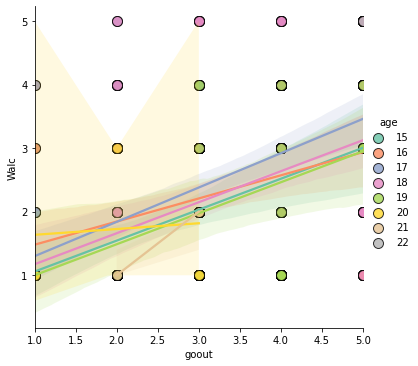

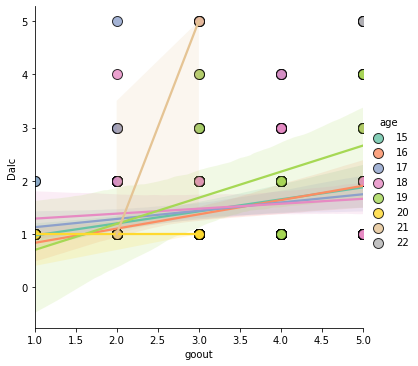

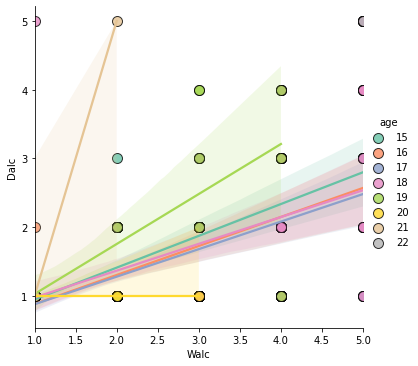

In [100]:
ax1 = sns.lmplot(
    x="goout", 
    y="Walc", 
    hue="age", 
    data=gp_school_portuguese_data_marks_and_age, 
    palette="Set2", 
    scatter_kws = {'s':100, 'edgecolor': 'black'})

ax2 = sns.lmplot(
    x="goout", 
    y="Dalc", 
    hue="age", 
    data=gp_school_portuguese_data_marks_and_age, 
    palette="Set2", 
    scatter_kws = {'s':100, 'edgecolor': 'black'})

ax3 = sns.lmplot(
    x="Walc", 
    y="Dalc", 
    hue="age", 
    data=gp_school_portuguese_data_marks_and_age, 
    palette="Set2", 
    scatter_kws = {'s':100, 'edgecolor': 'black'})

By disregarding the outliers with ages 20 and 21 in the analysis, we observe that the pattern of failures aligns with the findings from the math dataset. The occurrence of higher failure rates among older students remains consistent, indicating a similar trend.

The unusual results for the age groups of 20 and 21 can be attributed to the small sample size within these groups, with less than 10 students in each category. This limited sample size violates the assumption of having a sufficiently large sample for statistical analysis.

In [102]:
ms_school_portuguese_data_marks_and_age = portuguese_data[portuguese_data['school']=='MS']

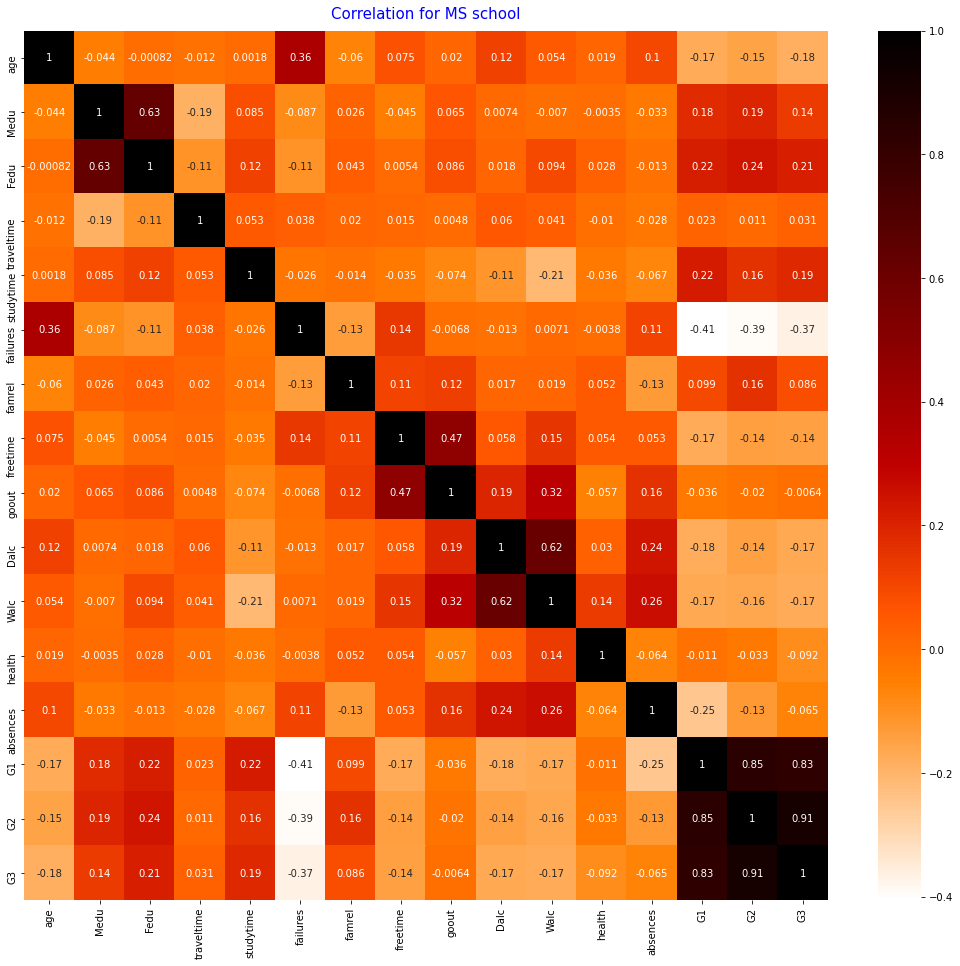

In [103]:
plt.figure(figsize = (18,16))
sns.heatmap(ms_school_portuguese_data_marks_and_age.corr(), annot = True, cmap = 'gist_heat_r')
plt.title("Correlation for MS school", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

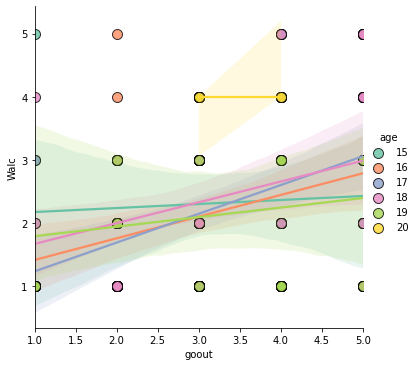

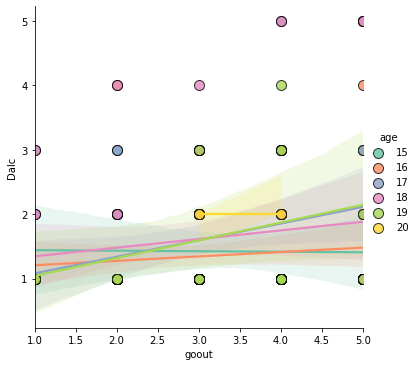

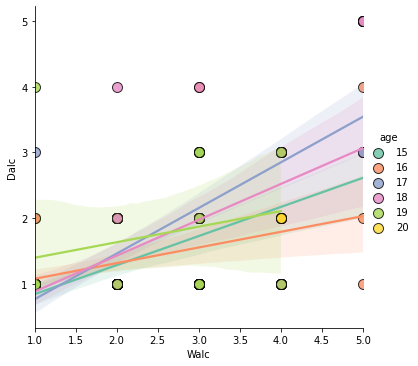

In [104]:
ax2 = sns.lmplot(
    x = "goout", 
    y = "Walc", 
    hue = "age", 
    palette="Set2", 
    data = ms_school_portuguese_data_marks_and_age, 
    scatter_kws = {'s':100, 'edgecolor': 'black'})

ax3 = sns.lmplot(
    x = "goout", 
    y = "Dalc", 
    hue = "age", 
    palette="Set2", 
    data = ms_school_portuguese_data_marks_and_age, 
    scatter_kws = {'s':100, 'edgecolor': 'black'})

ax3 = sns.lmplot(
    x="Walc", 
    y="Dalc", 
    hue="age", 
    data=ms_school_portuguese_data_marks_and_age, 
    palette="Set2", 
    scatter_kws = {'s':100, 'edgecolor': 'black'})

Here again, not significal difference between the two school, nor between portuguese and math classes.

In [105]:
ms_school_portuguese_data_marks_and_age = ms_school_portuguese_data_marks_and_age[ms_school_portuguese_data_marks_and_age['failures']!=0]
ms_school_portuguese_data_marks_and_age['counter'] = 1
ms_school_portuguese_data_marks_and_age_slice = pd.DataFrame(ms_school_portuguese_data_marks_and_age[['age', 'failures', 'counter']].groupby(['failures', 'age']).count().reset_index())
ms_school_portuguese_data_marks_and_age_slice

failures  age  counter
0          1   15        2
1          1   16        4
2          1   17       11
3          1   18       13
4          1   19        9
5          1   20        2
6          2   16        1
7          2   18        4
8          2   19        1
9          3   16        1
10         3   17        2
11         3   19        3

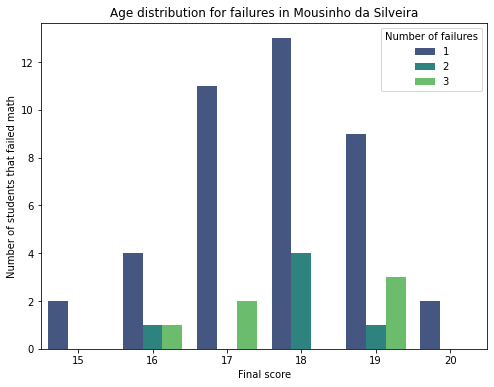

In [107]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.barplot(x=ms_school_portuguese_data_marks_and_age_slice.age, y=ms_school_portuguese_data_marks_and_age_slice.counter, hue=ms_school_portuguese_data_marks_and_age_slice.failures, palette = 'viridis')
ax.set_title("Age distribution for failures in Mousinho da Silveira")
ax.set_ylabel("Number of students that failed math")
ax.set_xlabel("Final score")
ax.legend(title='Number of failures', loc = "upper right")

The distribution of failures in this school is indeed intriguing, as the frequency of failures follows a bell-shaped curve, with a mean of 18 for all categories of failures, although it is more pronounced for the category of one failure. This pattern differs from the distribution observed in the math dataset from the same school.

One potential explanation for this observation could be the presence of specific exams or assessments around the age of 18 that pose particular challenges for students. These exams might be more rigorous or demanding, resulting in a higher concentration of failures around that age and contributing to the distinct shape of the curve.

In [108]:
gp_school_portuguese_data_marks_and_age = gp_school_portuguese_data_marks_and_age[gp_school_portuguese_data_marks_and_age['failures']!=0]
gp_school_portuguese_data_marks_and_age['counter'] = 1

In [109]:
gp_school_portuguese_data_marks_and_age_slice = pd.DataFrame(gp_school_portuguese_data_marks_and_age[['age', 'failures', 'counter']].groupby(['failures', 'age']).count().reset_index())

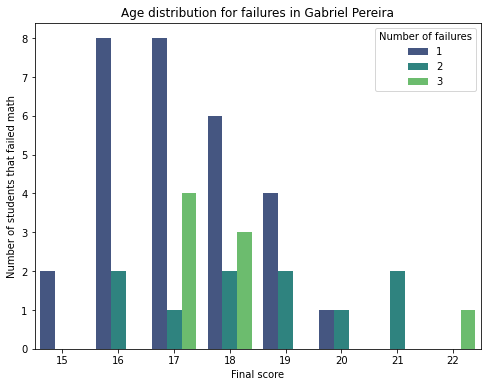

In [111]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.barplot(x=gp_school_portuguese_data_marks_and_age_slice.age, y=gp_school_portuguese_data_marks_and_age_slice.counter, hue=gp_school_portuguese_data_marks_and_age_slice.failures, palette = 'viridis')
ax.set_title("Age distribution for failures in Gabriel Pereira")
ax.set_ylabel("Number of students that failed math")
ax.set_xlabel("Final score")
ax.legend(title='Number of failures', loc = "upper right")

In addition to the previous observations, we notice another divergence in the distribution of failures within Mousinho da Silveira School. Overall, there is a decrease in the number of failures over time, although the count remains relatively stable for students with two failures across different age groups.

If we continue to build upon our previous hypothesis, one could argue that this school follows stricter academic standards and provides better preparation for their students, resulting in a decline in the number of failures as students progress through their education. However, it is important to note that at this point, there is still insufficient evidence to fully support this hypothesis.

## Data preparation and transformation

### Classification

We will perform a comparative analysis of four different machine learning algorithms for classification purposes: 
 * K-Nearest Neighbors (KNN), 
 * Naive Bayes Classifier, 
 * Decision Tree, 
 * Extra Trees Classifier. 

By evaluating the performance of these algorithms, we aim to determine which one yields the most accurate and reliable results for our classification task.

Each algorithm has its own unique characteristics and underlying principles. **KNN** is a non-parametric algorithm that classifies data based on the majority vote of its k nearest neighbors. **Naive Bayes Classifier** utilizes Bayes' theorem to make predictions by assuming independence among the features. **Decision Tree** constructs a tree-like model to make decisions based on feature values. **Extra Trees Classifier** is an ensemble method that combines multiple decision trees to improve accuracy and robustness.

By comparing the results of these algorithms, we can assess their strengths and weaknesses in our specific classification scenario. This analysis will help us identify the most suitable algorithm to achieve optimal performance and accurate predictions for our dataset.

To begin, we will merge both of our datasets into a single dataset, which will serve as the foundation for training our machine learning algorithms. This merging process involves combining the relevant information from both datasets to create a comprehensive and unified dataset that captures the necessary features for our classification task.

In [112]:
math_data = pd.read_csv('Maths.csv')
port_data = pd.read_csv('Portuguese.csv')
data = math_data.append(port_data.iloc[:, :])
data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[1044 rows x 33 columns]

In order to transform our dataset for the classification task, we have decided to categorize the students based on their final G3 scores. To accomplish this, we will create a dictionary mapping each score range to a corresponding category. The categories we have defined are as follows:

* Excellent student: Scores ranging from 17 to 20
* Good student: Scores ranging from 13 to 16
* Passed student: Scores ranging from 10 to 12
* Failed student: Scores ranging from 0 to 9

By mapping the original dataset to this dictionary, each student's final G3 score will be replaced with the appropriate category label. This transformation will enable us to treat the classification task as a problem of predicting the category label based on the available features.

In [113]:
grade_ranking = {20:"Excellent student", 19:"Excellent student", 18:"Excellent student", 17:"Excellent student",
                16:"Good student", 15:"Good student", 14:"Good student", 13:"Good student",
                12:"Passed student",11:"Passed student",10:"Passed student",
                9:"Failed", 8:"Failed",7:"Failed",6:"Failed",5:"Failed",
                4:"Failed",3:"Failed",2:"Failed",1:"Failed",0:"Failed"}

In [114]:
data["studCategory"] = data["G3"].map(grade_ranking)
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3    studCategory  
0        3     4     1     1       3        6   5   6   6          Failed  
1        3     3     1     1       3        4   5   5   6          Failed  
2        3     2     2     3       3       10   7   8  10  Passed student  
3        2     2     1     1       5        2  15  14  15    Good student  
4        3     2     1     2       5        4   6  10  10  Passed student  

[5 rows x 34 columns]

To transform our categorical (object) values into numerical values, we can utilize the OneHotEncoder() method. This technique is commonly used for encoding categorical variables to ensure compatibility with machine learning algorithms.

The OneHotEncoder() function will create binary dummy variables for each category in a given feature column. Each category will be represented by a separate column, and the presence or absence of a category in a particular row will be indicated by a binary value (0 or 1).

By applying the OneHotEncoder() to our dataset, we can convert the categorical features into numerical representations that can be used by our classification algorithms. This transformation ensures that the algorithms can effectively analyze and interpret the categorical data during the training and prediction phases.

In [115]:
ohEnc = OneHotEncoder()
encoded_columns = ohEnc.fit_transform(data[['school', 'sex', 'address', "famsize", "Pstatus", "Mjob", "Fjob",
                                                "reason", "guardian", "schoolsup", "famsup", "paid", "activities", 
                                                "nursery", "higher", "internet", "romantic"]])

In [116]:
encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=ohEnc.get_feature_names_out(['school', 'sex', 'address', "famsize", "Pstatus", "Mjob", "Fjob",
                                                "reason", "guardian", "schoolsup", "famsup", "paid", "activities", 
                                                "nursery", "higher", "internet", "romantic"]))
data.reset_index(drop=True, inplace=True)
data = pd.concat([data.drop(['school', 'sex', 'address', "famsize", "Pstatus", "Mjob", "Fjob",
                                                "reason", "guardian", "schoolsup", "famsup", "paid", "activities", 
                                                "nursery", "higher", "internet", "romantic"], axis=1), encoded_df], axis=1)

Let's split our data for train data and test data and remove the final grade column.

In [117]:
y = data["studCategory"]
X = data.drop(["G3", "studCategory"], axis = 1)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

To ensure that all the features in our dataset are on a uniform scale, we can apply the StandardScaler() method. This technique is commonly used for feature scaling in machine learning tasks.

The StandardScaler() method standardizes the features by subtracting the mean and dividing by the standard deviation of each feature. This process transforms the values of each feature to have a mean of 0 and a standard deviation of 1.

By applying the StandardScaler() to our dataset, we can achieve consistency in the scales of the numerical features. This is important because many machine learning algorithms perform better when the features are on a similar scale, as it prevents certain features from dominating the learning process.

In [127]:
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

## Train model

### KNN 

**K-Nearest Neighbors (KNN)** is a popular machine learning algorithm used for classification tasks. It is a non-parametric algorithm that makes predictions based on the similarity between the input data point and its neighboring data points.

In KNN, the value of K determines the number of neighboring data points considered for classification. 

To understand at which point we'll obtain the less error, we will do a neighbors exploration analysis. For that we will use the elbow method. 

To find the optimal number of neighbors (K) for KNN classification using the elbow method, we can use a different approach based on model evaluation. One common evaluation metric for classification is accuracy.

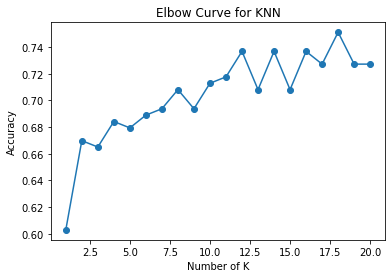

In [129]:
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

# Plot the elbow curve
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.title('Elbow Curve for KNN')
plt.show()

By following results, we can conclude that KNN classification will work best with 18 neighbours.

In [139]:
knn = KNeighborsClassifier(n_neighbors = 18)
start = time.time()
knn_model = knn.fit(X_train, y_train)
end = time.time()
train_time = end - start

In [141]:
start = time.time()
knn_predictions = knn.predict(X_test)
end = time.time()
test_time = end - start
knn_pred_values = pd.DataFrame(knn_predictions, columns = {"studCategory"})
knn_pred_values["Count"] = 1
knn_pred_values = pd.DataFrame(knn_pred_values.groupby(knn_pred_values["studCategory"]).count().reset_index())
knn_pred_values

studCategory  Count
0  Excellent student      7
1             Failed     39
2       Good student     67
3     Passed student     96

In [132]:
knn_act_values = pd.DataFrame(y_test)
knn_act_values["Count"] = 1
knn_act_values = pd.DataFrame(knn_act_values.groupby(knn_act_values["studCategory"]).count().reset_index())
knn_act_values 

studCategory  Count
0  Excellent student     11
1             Failed     60
2       Good student     64
3     Passed student     74

In [133]:
pred_df = pd.merge(knn_act_values, knn_pred_values, how = "outer", on='studCategory', suffixes = ('_act', '_pred'))
pred_df['Count_pred'] = pred_df['Count_pred'].fillna(0)
pred_df = pred_df.astype({'Count_pred':'int'})
pred_df = pd.melt(pred_df, id_vars='studCategory')
pred_df

studCategory    variable  value
0  Excellent student   Count_act     11
1             Failed   Count_act     60
2       Good student   Count_act     64
3     Passed student   Count_act     74
4  Excellent student  Count_pred      7
5             Failed  Count_pred     39
6       Good student  Count_pred     67
7     Passed student  Count_pred     96

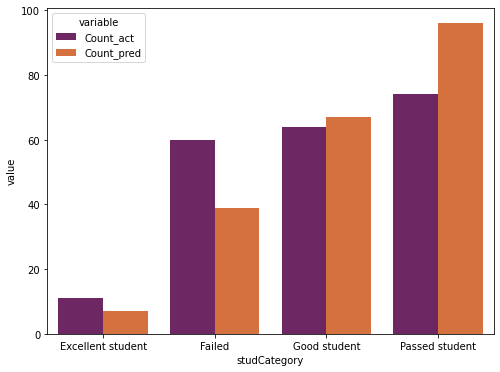

In [134]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.barplot(x=pred_df.studCategory, y=pred_df.value, hue=pred_df.variable, palette = 'inferno')

In [142]:
accuracy = accuracy_score(y_test, knn_predictions)
print("===================")
print(f"Accuracy: {accuracy}")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")

Accuracy: 0.7511961722488039
Train time: 0.004960536956787109
Test time: 0.01894855499267578


### Naive Bayes Classifier

The Naive Bayes classifier assumes independence between features given the class. However, if a particular feature has a category that does not appear in the training data for a certain class, it can result in zero probabilities and cause issues during classification. The GaussianNB class has a parameter called var_smoothing that provides a smoothing parameter to address this issue. By default, it is set to a very small value (1e-9) to ensure numerical stability.

By playing with the parameters, we concluded that **var_smoothing = 1e-7** will show us the best performance results for this algorithm.

In [153]:
nb = GaussianNB(var_smoothing = 1e-7)
#Training
start = time.time()
nb_model = nb.fit(X_train, y_train)
end = time.time()
train_time = end - start

#Testing
start = time.time()
nb_pred = nb.predict(X_test)
end = time.time()
test_time = end - start

#Evaluating
accuracy = nb.score(X_test, y_test)
print("===================")
print(f"Accuracy: {accuracy}")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")

Accuracy: 0.4688995215311005
Train time: 0.003990888595581055
Test time: 0.001995086669921875


Because our dataset contains hidden interdependances, the Naive Bayes Classifier works not as best as we've expected. 
But it shows a great time performance.

### Descision Tree

The decision tree algorithm is a popular supervised learning algorithm used for both classification and regression tasks. It builds a tree-like model where each internal node represents a feature or attribute, each branch represents a decision based on that attribute, and each leaf node represents a class label or a predicted value.
**max_features=40 and max_depth=12** parameters were chosen by compilation of different settings as those, which showed the best performance.

In [167]:
clf = DecisionTreeClassifier(random_state = 0, max_features=40, max_depth=12)

#Training
start = time.time()
clf = clf.fit(X_train,y_train)
end = time.time()
train_time = end - start

#Testing
start = time.time()
y_pred = clf.predict(X_test)
end = time.time()
test_time = end - start

#Evaluating

accuracy = accuracy_score(y_test, y_pred)
print("===================")
print(f"Accuracy: {accuracy}")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")


Accuracy: 0.7416267942583732
Train time: 0.0069980621337890625
Test time: 0.002010345458984375


Here the visualization of our tree.

In [168]:
cols = data.columns.to_list()
cols.remove('studCategory')
cols.remove('G3')

r = export_text(clf, feature_names=cols)
print(r)

|--- G2 <= 11.50
|   |--- G2 <= 8.50
|   |   |--- G2 <= 7.50
|   |   |   |--- class: Failed
|   |   |--- G2 >  7.50
|   |   |   |--- G1 <= 7.50
|   |   |   |   |--- class: Failed
|   |   |   |--- G1 >  7.50
|   |   |   |   |--- nursery_no <= 0.50
|   |   |   |   |   |--- goout <= 3.50
|   |   |   |   |   |   |--- romantic_no <= 0.50
|   |   |   |   |   |   |   |--- class: Failed
|   |   |   |   |   |   |--- romantic_no >  0.50
|   |   |   |   |   |   |   |--- address_U <= 0.50
|   |   |   |   |   |   |   |   |--- class: Passed student
|   |   |   |   |   |   |   |--- address_U >  0.50
|   |   |   |   |   |   |   |   |--- studytime <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: Passed student
|   |   |   |   |   |   |   |   |--- studytime >  1.50
|   |   |   |   |   |   |   |   |   |--- class: Failed
|   |   |   |   |   |--- goout >  3.50
|   |   |   |   |   |   |--- class: Failed
|   |   |   |   |--- nursery_no >  0.50
|   |   |   |   |   |--- traveltime <= 1.50
|   |   |   | 

### Extra Trees Classifier

In [177]:
trees = ExtraTreesClassifier(max_depth = 10, n_estimators=100)
trees.fit(X_train, y_train)
score = trees.score(X_train, y_train)
score

#Training
start = time.time()
trees.fit(X_train, y_train)
end = time.time()
train_time = end - start

#Testing
start = time.time()
tree_pred = trees.predict(X_test)
end = time.time()
test_time = end - start

accuracy = accuracy_score(y_test, y_pred)
print("===================")
print(f"Accuracy: {accuracy}")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")


Accuracy: 0.7416267942583732
Train time: 0.13762927055358887
Test time: 0.010970354080200195


### Results
After evaluating the performance of different classifiers, we have observed the following results:

KNN (K-Nearest Neighbors) classifier showed the best performance in terms of accuracy. It achieved the highest accuracy among the classifiers considered.

Naive Bayes classifier, although not as accurate as KNN, demonstrated faster performance. It is known for its simplicity and efficiency in handling large datasets.

Decision Tree classifier and Extra Trees Classifier showed similar performance to KNN. They achieved reasonably good accuracy, but not as high as KNN.

In summary, if accuracy is the primary concern, KNN would be the recommended choice. However, if computational efficiency is a priority, Naive Bayes classifier can provide faster results. Decision Tree can be considered as alternative option, offering a balance between accuracy and efficiency.

## Regression

### Linear regression

We will perform a comparative analysis of six different machine learning algorithms for regression purposes:

* Linear regression,
* Decision Tree,
* K-Nearest Neighbors (KNN),
* Random forest,
* SVM,
* Extra Trees Regressor.

By evaluating the performance of these algorithms, we aim to determine which one yields the most accurate and reliable results for our classification task.

Uploading and mergind the datasets into one: 

In [178]:
math_data = pd.read_csv('Maths.csv')
port_data = pd.read_csv('Portuguese.csv')
data = math_data.append(port_data.iloc[:, :])
data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[1044 rows x 33 columns]

In [179]:
ohEnc = OneHotEncoder()
encoded_columns = ohEnc.fit_transform(data[['school', 'sex', 'address', "famsize", "Pstatus", "Mjob", "Fjob",
                                                "reason", "guardian", "schoolsup", "famsup", "paid", "activities", 
                                                "nursery", "higher", "internet", "romantic"]])
encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=ohEnc.get_feature_names_out(['school', 'sex', 'address', "famsize", "Pstatus", "Mjob", "Fjob",
                                                "reason", "guardian", "schoolsup", "famsup", "paid", "activities", 
                                                "nursery", "higher", "internet", "romantic"]))
data.reset_index(drop=True, inplace=True)
data = pd.concat([data.drop(['school', 'sex', 'address', "famsize", "Pstatus", "Mjob", "Fjob",
                                                "reason", "guardian", "schoolsup", "famsup", "paid", "activities", 
                                                "nursery", "higher", "internet", "romantic"], axis=1), encoded_df], axis=1)

In [180]:
y = data["G3"]
X = data.drop("G3", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=16)
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

### Linear regression

Linear regression is a statistical modeling technique used to understand and predict the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables, where the dependent variable can be modeled as a linear combination of the independent variables.

**Performance:** Linear regression is a commonly used algorithm for regression tasks. It assumes a linear relationship between the independent variables and the target variable. It is computationally efficient and provides interpretable coefficients.

**Pros:** Simplicity, interpretability, fast training and prediction.

**Cons:** Assumes linearity, may not capture complex non-linear relationships well.

In [185]:
reg = LinearRegression()

#Training
start = time.time()
reg.fit(X_train, y_train)
end = time.time()
train_time = end - start

#Testing
start = time.time()
y_pred = reg.predict(X_test)
end = time.time()
test_time = end - start

In [186]:
lrg_mae_full = mean_absolute_error(y_test, y_pred) 
lrg_mse_full = mean_squared_error(y_test, y_pred)
lrg_rmse_full = sqrt(lrg_mse_full)
lrg_var_full = explained_variance_score(y_test, y_pred)

lrg_results = [lrg_mae_full, lrg_mse_full, lrg_rmse_full, lrg_var_full]

print("===================")
print ('MAE = {:.3f}'.format(lrg_mae_full) )
print ('RMSE = {0:.3f} \t MSE = {1:.3f} '.format(lrg_rmse_full, lrg_mse_full) )
print ('Explained Variance = {:.3f}'.format(lrg_var_full))
print("===================")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")

MAE = 1.064
RMSE = 1.630 	 MSE = 2.657 
Explained Variance = 0.813
Train time: 0.00299072265625
Test time: 0.0


In order to make a better visualization, we'll caculate the distances between the actual and predicted data for each row, so then we can make the special 'marking' column on its base:

In [188]:
y_delta = (y_test - y_pred).abs()
y_delta.describe()

count    345.000000
mean       1.063548
std        1.237172
min        0.000365
25%        0.401131
50%        0.734740
75%        1.328866
max        9.110717
Name: G3, dtype: float64

In the next part we will add the special column 'marker' in order to make the visual distribution of the results, that lay in 75% of the total deviation range.

In [189]:
df = pd.DataFrame(y_test)
df['scorePred'] = y_pred
df['marker'] = y_delta.apply(lambda x: "accurate" if x < (1.32) else "could be better")
info = pd.DataFrame(round(df['marker'].value_counts()*100/df['marker'].count(),2))
info

marker
accurate          74.49
could be better   25.51

Let's visualize or linear regression:

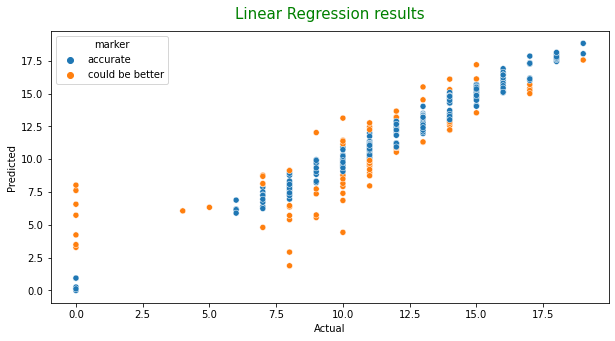

In [209]:
#visualize model
fig = plt.figure(figsize=(10,5))
x = y_test
y = y_pred
plt.title('Linear Regression results', fontsize = 15, color = 'g', pad = 12)
sns.scatterplot(data=df, x="G3", y="scorePred", hue="marker")
m, b = np.polyfit(x, y, 1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Descision Tree regressor


The Decision Tree Regressor is a machine learning algorithm used for regression tasks. It builds a decision tree model that predicts the target variable based on a set of input features.

The algorithm works by recursively splitting the data based on the feature that maximizes the reduction in variance or another specified criterion. It continues splitting until a stopping condition is met, such as reaching a maximum depth or minimum number of samples per leaf.

**Performance:** Random Forests is an ensemble algorithm that combines multiple decision trees to make predictions. It can capture non-linear relationships, handle interactions between variables, and provide robust performance.

**Pros:** Handles non-linear relationships, robust performance, handles high-dimensional data.

**Cons:** Less interpretable compared to individual decision trees.

In [229]:
dtr = DecisionTreeRegressor()

#Training
start = time.time()
dtr.fit(X_train, y_train)
end = time.time()
train_time = end - start

#Testing
start = time.time()
y_pred = dtr.predict (X_test)
end = time.time()
test_time = end - start


dtr_mae_full = mean_absolute_error(y_test, y_pred)
dtr_mse_full = mean_squared_error(y_test, y_pred)
dtr_rmse_full = sqrt(dtr_mse_full)
dtr_var_full = explained_variance_score(y_test, y_pred)

dtr_results = [dtr_mae_full, dtr_mse_full, dtr_rmse_full, dtr_var_full]

print("===================")
print ('MAE = {:.3f}'.format(dtr_mae_full) )
print ('RMSE = {0:.3f} \t MSE = {1:.3f} '.format(dtr_rmse_full, dtr_mse_full) )
print ('Explained Variance = {:.3f}'.format(dtr_var_full))
print("===================")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")

MAE = 1.136
RMSE = 2.078 	 MSE = 4.319 
Explained Variance = 0.700
Train time: 0.007014274597167969
Test time: 0.0


In [193]:
y_delta = (y_test - y_pred).abs()
y_delta.describe()

count    345.000000
mean       1.163768
std        1.790639
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max       11.000000
Name: G3, dtype: float64

In [194]:
df = pd.DataFrame(y_test)
df['scorePred'] = y_pred
df['marker'] = y_delta.apply(lambda x: "accurate" if x < (1) else "could be better")
info = pd.DataFrame(round(df['marker'].value_counts()*100/df['marker'].count(),2))
info

marker
could be better    62.9
accurate           37.1

Let's visualize our model

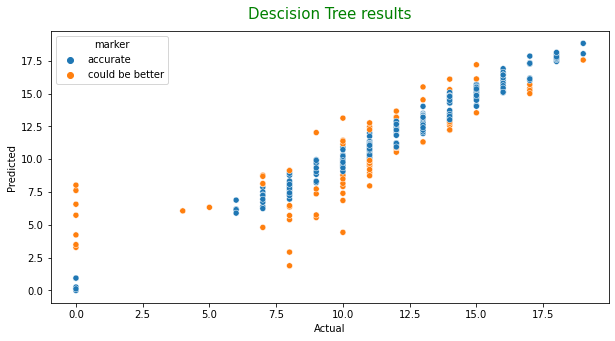

In [208]:
fig = plt.figure(figsize=(10,5))
x = y_test
y = y_pred
plt.title('Descision Tree results', fontsize = 15, color = 'g', pad = 12)
sns.scatterplot(data=df, x="G3", y="scorePred", hue="marker")
m, b = np.polyfit(x, y, 1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### KNN 

**K-Nearest Neighbors (KNN)** is a popular machine learning algorithm used for regression tasks. It is a non-parametric algorithm that makes predictions based on the distances between the input data point and its neighboring data points.

**Performance:** KNN is a non-parametric algorithm that predicts the value of a data point based on the values of its k nearest neighbors. It can handle non-linear relationships and adapt to the data.

**Pros:** Flexibility, handles non-linear relationships, easy implementation.

**Cons:** Can be sensitive to the choice of k, computationally expensive for large datasets.

We will use again the elbow method based on Mean Squared Error to calculate the optimal number of neighbors.

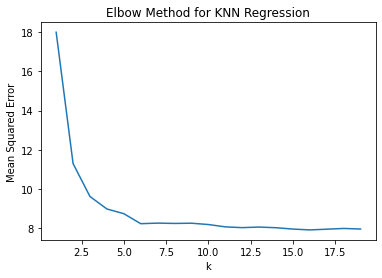

In [197]:
k_values = np.arange(1, 20)
mse_values = []

for k in k_values:
    regressor = KNeighborsRegressor(n_neighbors=k)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(k_values, mse_values)
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('Elbow Method for KNN Regression')
plt.show()

In [230]:
knn = KNeighborsRegressor(n_neighbors=16)

#Training
start = time.time()
knn.fit(X_train, y_train)
end = time.time()
train_time = end - start

#Testing
start = time.time()
y_pred = knn.predict (X_test)
end = time.time()
test_time = end - start

knn_mae_full = mean_absolute_error(y_test, y_pred)
knn_mse_full = mean_squared_error(y_test, y_pred)
knn_rmse_full = sqrt(knn_mse_full)
knn_var_full = explained_variance_score(y_test, y_pred)

knn_results = [knn_mae_full, knn_mse_full, knn_rmse_full, knn_var_full]

print("===================")
print ('MAE = {:.3f}'.format(knn_mae_full) )
print ('RMSE = {0:.3f} \t MSE = {1:.3f} '.format(knn_rmse_full, knn_mse_full) )
print ('Explained Variance = {:.3f}'.format(knn_var_full))
print("===================")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")

MAE = 1.925
RMSE = 2.813 	 MSE = 7.913 
Explained Variance = 0.447
Train time: 0.000997304916381836
Test time: 0.014992475509643555


In [200]:
y_delta = (y_test - y_pred).abs()
y_delta.describe()

count    345.000000
mean       1.925362
std        2.053749
min        0.000000
25%        0.562500
50%        1.312500
75%        2.562500
max       11.000000
Name: G3, dtype: float64

In [201]:
df = pd.DataFrame(y_test)
df['scorePred'] = y_pred
df['marker'] = y_delta.apply(lambda x: "accurate" if x < (2.56) else "could be better")
info = pd.DataFrame(round(df['marker'].value_counts()*100/df['marker'].count(),2))
info

marker
accurate           74.2
could be better    25.8

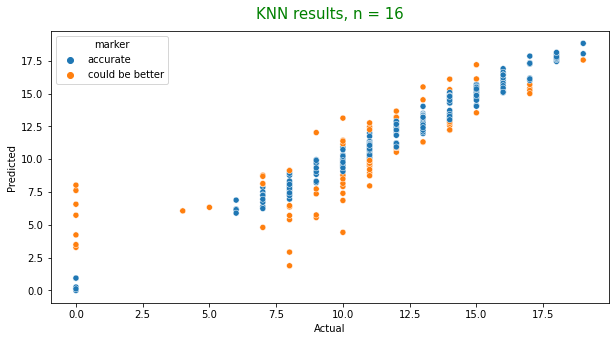

In [207]:
#visualize model
fig = plt.figure(figsize=(10,5))
x = y_test
y = y_pred
plt.title('KNN results, n = 16', fontsize = 15, color = 'g', pad = 12)
sns.scatterplot(data=df, x="G3", y="scorePred", hue="marker")
m, b = np.polyfit(x, y, 1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Random forest


**Random Forest** is an ensemble learning method that combines multiple decision trees to create a more robust and accurate regression model. It works by building multiple decision trees on random subsets of the data and then averaging their predictions to make the final prediction.

**Performance:** Random Forests is an ensemble algorithm that combines multiple decision trees to make predictions. It can capture non-linear relationships, handle interactions between variables, and provide robust performance.
**Pros:** Handles non-linear relationships, robust performance, handles high-dimensional data.
**Cons:** Less interpretable compared to individual decision trees.

In [231]:
rfr = RandomForestRegressor(max_depth=12, random_state=0)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

#Training
start = time.time()
rfr.fit(X_train, y_train)
end = time.time()
train_time = end - start

#Testing
start = time.time()
y_pred = rfr.predict (X_test)
end = time.time()
test_time = end - start

rfr_mae_full = mean_absolute_error(y_test, y_pred)
rfr_mse_full = mean_squared_error(y_test, y_pred)
rfr_rmse_full = sqrt(rfr_mse_full)
rfr_var_full = explained_variance_score(y_test, y_pred)

rfr_results = [rfr_mae_full, rfr_mse_full, rfr_rmse_full, rfr_var_full]

print("===================")
print ('MAE = {:.3f}'.format(rfr_mae_full) )
print ('RMSE = {0:.3f} \t MSE = {1:.3f} '.format(rfr_rmse_full, rfr_mse_full) )
print ('Explained Variance = {:.3f}'.format(rfr_var_full))
print("===================")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")

MAE = 0.883
RMSE = 1.383 	 MSE = 1.914 
Explained Variance = 0.866
Train time: 0.4607391357421875
Test time: 0.010010004043579102


In [204]:
y_delta = (y_test - y_pred).abs()
y_delta.describe()

count    345.000000
mean       0.882557
std        1.066862
min        0.000000
25%        0.260000
50%        0.610000
75%        1.099096
max        8.022843
Name: G3, dtype: float64

In [205]:
df = pd.DataFrame(y_test)
df['scorePred'] = y_pred
df['marker'] = y_delta.apply(lambda x: "accurate" if x < (1.09) else "could be better")
info = pd.DataFrame(round(df['marker'].value_counts()*100/df['marker'].count(),2))
info

marker
accurate          74.78
could be better   25.22

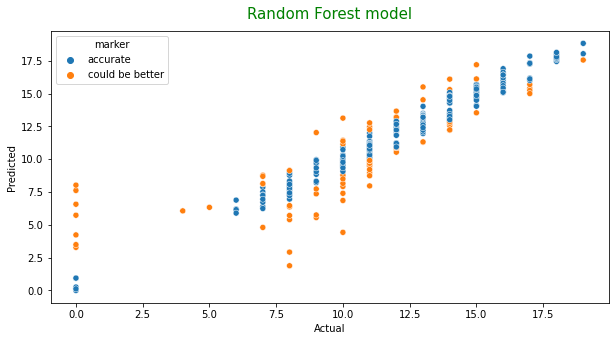

In [206]:
#visualize model
fig = plt.figure(figsize=(10,5))
x = y_test
y = y_pred
plt.title('Random Forest model', fontsize = 15, color = 'g', pad = 12)
sns.scatterplot(data=df, x="G3", y="scorePred", hue="marker")
m, b = np.polyfit(x, y, 1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### SVM
In SVM, the algorithm aims to find an optimal hyperplane in a high-dimensional feature space that can separate the data points into different classes. The hyperplane is chosen in such a way that it maximizes the margin between the classes, allowing for better generalization and improved performance on unseen data.

**Performance:** SVM is a versatile algorithm that can be used for both classification and regression tasks. It finds the hyperplane that maximizes the margin between the predicted values and the target values.

**Pros:** Effective for high-dimensional data, handles non-linear relationships using kernel tricks, robust against outliers.
**Cons:** Can be sensitive to parameter tuning, slower training for large datasets.

In order to find an optimized parameters, we'll use GridSearchCV.
GridSearchCV is a method in scikit-learn that allows you to systematically search for the optimal combination of hyperparameters for a machine learning model. It performs an exhaustive search over a specified parameter grid and evaluates the model's performance using cross-validation.

GridSearchCV combines the concept of grid search, which systematically explores different hyperparameter combinations, with cross-validation to evaluate the performance of each combination. It performs cross-validation for each set of hyperparameters and provides the best combination based on the specified evaluation metric.

In [232]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()

#Training
start = time.time()
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_train, y_train)
end = time.time()
train_time = end - start

#Testing
start = time.time()
y_pred = grid_search.predict (X_test)
end = time.time()
test_time = end - start

svr_mae_full = mean_absolute_error(y_test, y_pred)
svr_mse_full = mean_squared_error(y_test, y_pred)
svr_rmse_full = sqrt(svr_mse_full)
svr_var_full = explained_variance_score(y_test, y_pred)

svr_results = [svr_mae_full, svr_mse_full, svr_rmse_full, svr_var_full]

print("===================")
print ('MAE = {:.3f}'.format(svr_mae_full) )
print ('RMSE = {0:.3f} \t MSE = {1:.3f} '.format(svr_rmse_full, svr_mse_full) )
print ('Explained Variance = {:.3f}'.format(svr_var_full))
print("===================")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")

Fitting 5 folds for each of 342 candidates, totalling 1710 fits
MAE = 0.924
RMSE = 1.457 	 MSE = 2.123 
Explained Variance = 0.851
Train time: 70.184152841568
Test time: 0.005983829498291016


In [216]:
y_delta = (y_test - y_pred).abs()
y_delta.describe()

count    345.000000
mean       0.924196
std        1.128065
min        0.000000
25%        0.257143
50%        0.657143
75%        1.085714
max        8.828571
Name: G3, dtype: float64

In [217]:
df = pd.DataFrame(y_test)
df['scorePred'] = y_pred
df['marker'] = y_delta.apply(lambda x: "accurate" if x < (1.08) else "could be better")
info = pd.DataFrame(round(df['marker'].value_counts()*100/df['marker'].count(),2))
info

marker
accurate           74.2
could be better    25.8

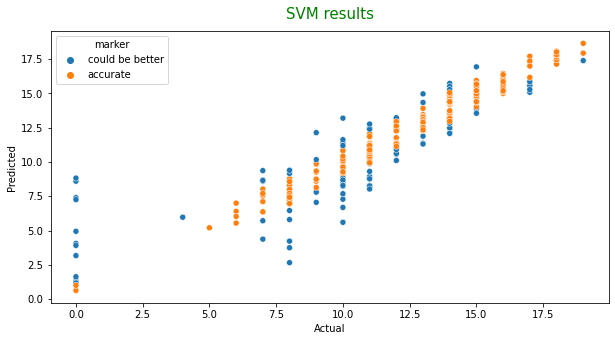

In [218]:
#visualize model
fig = plt.figure(figsize=(10,5))
x = y_test
y = y_pred
plt.title('SVM results', fontsize = 15, color = 'g', pad = 12)
sns.scatterplot(data=df, x="G3", y="scorePred", hue="marker")
m, b = np.polyfit(x, y, 1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Now, we'll collect our data of evaluation in a separate dataframe and then visualize them by using seaborn barplot chart.

### Extra trees regression

In [226]:
grid_search = GridSearchCV(ExtraTreesRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=10, scoring="r2",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

grid_search_mae_full = mean_absolute_error(y_test, y_pred)
grid_search_mse_full = mean_squared_error(y_test, y_pred)
grid_search_rmse_full = sqrt(svr_mse_full)
grid_search_var_full = explained_variance_score(y_test, y_pred)

grid_search_results = [grid_search_mae_full, grid_search_mse_full, grid_search_rmse_full, grid_search_var_full]

print("===================")
print ('MAE = {:.3f}'.format(grid_search_mae_full) )
print ('RMSE = {0:.3f} \t MSE = {1:.3f} '.format(grid_search_rmse_full, grid_search_mse_full) )
print ('Explained Variance = {:.3f}'.format(grid_search_var_full))
print("===================")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")

Fitting 10 folds for each of 342 candidates, totalling 3420 fits
MAE = 1.925
RMSE = 1.457 	 MSE = 7.913 
Explained Variance = 0.447
Train time: 0.0010023117065429688
Test time: 0.014929533004760742


In [227]:
model_evaluation_df = pd.DataFrame([lrg_results, dtr_results, knn_results, rfr_results, svr_results, grid_search_results], columns=["mae", "mse", "rmse", 'var'], 
                                   index = ["Linear Regression", "Descision Tree", "KNN", "Random Forest", "SVM", "Extra trees regression"])
model_evaluation_df = model_evaluation_df.reset_index().rename(columns={'index':'model'})
copy_model_evaluation_df = pd.melt(model_evaluation_df, id_vars='model', value_vars=['mae', 'rmse', 'var'])

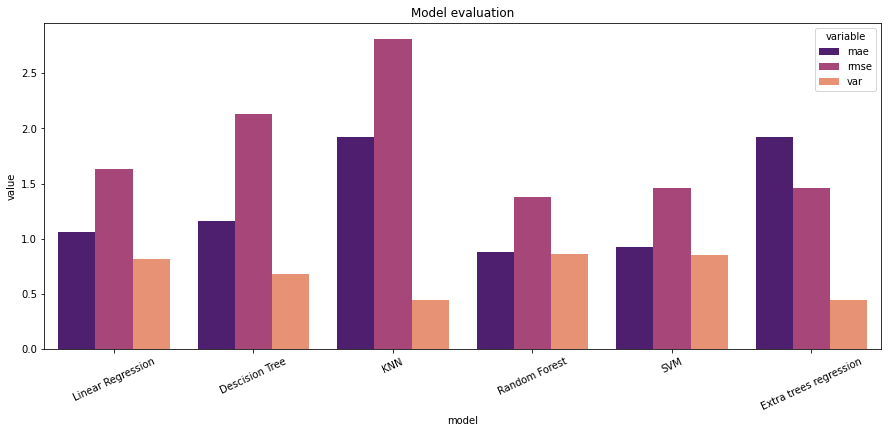

In [228]:
fig, ax = plt.subplots(figsize = (15, 6))
ax = sns.barplot(data=copy_model_evaluation_df , x='model', y='value', hue='variable', palette = 'magma')
ax.set_title("Model evaluation")
plt.xticks(rotation=25)
plt.show()

### Results

In terms of performance, Random Forest and SVM demonstrated the best results among the regression algorithms. They achieved higher accuracy and better prediction performance compared to the other algorithms. Random Forest leverages the power of ensemble learning, combining multiple decision trees to make more accurate predictions. SVM, on the other hand, uses a hyperplane to separate data points, resulting in robust regression performance.

On the other hand, KNN regression exhibited the poorest performance among the tested algorithms. KNN's reliance on local neighborhood information and its simplicity might not have been suitable for capturing complex relationships in the dataset, leading to lower accuracy.

In terms of computation time, Linear Regression stood out as the fastest algorithm. Linear regression is a simple and efficient algorithm that works well for datasets with linear relationships between the features and the target variable. Despite being computationally efficient, Linear Regression still delivered good results, suggesting its suitability for certain regression tasks.

#### Here we are trying to remove some columns with the less correlation to test the possible improvement of the quality of model.

In [233]:
y = data["G3"]
X = data.drop(["G3", "failures", "age", "health", "traveltime", "goout"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=16)
sc = StandardScaler()
#scaling the training set
X_train = sc.fit_transform(X_train)
#scaling the test set
X_test = sc.transform (X_test)

### Linear Regression

In [234]:
reg = LinearRegression()

#Training
start = time.time()
reg.fit(X_train, y_train)
end = time.time()
train_time = end - start

#Testing
start = time.time()
y_pred = reg.predict(X_test)
end = time.time()
test_time = end - start

lrg_mae_full = mean_absolute_error(y_test, y_pred) 
lrg_mse_full = mean_squared_error(y_test, y_pred)
lrg_rmse_full = sqrt(lrg_mse_full)
lrg_var_full = explained_variance_score(y_test, y_pred)

lrg_results = [lrg_mae_full, lrg_mse_full, lrg_rmse_full, lrg_var_full]

print("===================")
print ('MAE = {:.3f}'.format(lrg_mae_full) )
print ('RMSE = {0:.3f} \t MSE = {1:.3f} '.format(lrg_rmse_full, lrg_mse_full) )
print ('Explained Variance = {:.3f}'.format(lrg_var_full))
print("===================")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")

MAE = 1.034
RMSE = 1.607 	 MSE = 2.581 
Explained Variance = 0.818
Train time: 0.0029926300048828125
Test time: 0.0


### Descision Tree

In [235]:
dtr = DecisionTreeRegressor()

#Training
start = time.time()
dtr.fit(X_train, y_train)
end = time.time()
train_time = end - start

#Testing
start = time.time()
y_pred = dtr.predict (X_test)
end = time.time()
test_time = end - start


dtr_mae_full = mean_absolute_error(y_test, y_pred)
dtr_mse_full = mean_squared_error(y_test, y_pred)
dtr_rmse_full = sqrt(dtr_mse_full)
dtr_var_full = explained_variance_score(y_test, y_pred)

dtr_results = [dtr_mae_full, dtr_mse_full, dtr_rmse_full, dtr_var_full]

print("===================")
print ('MAE = {:.3f}'.format(dtr_mae_full) )
print ('RMSE = {0:.3f} \t MSE = {1:.3f} '.format(dtr_rmse_full, dtr_mse_full) )
print ('Explained Variance = {:.3f}'.format(dtr_var_full))
print("===================")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")

MAE = 1.191
RMSE = 2.123 	 MSE = 4.507 
Explained Variance = 0.683
Train time: 0.0049877166748046875
Test time: 0.000997304916381836


### KNN

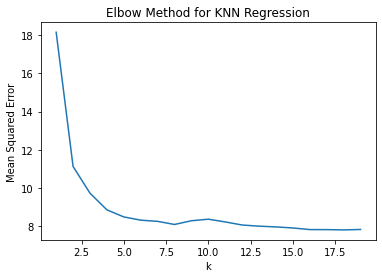

In [236]:
k_values = np.arange(1, 20)
mse_values = []

for k in k_values:
    regressor = KNeighborsRegressor(n_neighbors=k)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(k_values, mse_values)
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('Elbow Method for KNN Regression')
plt.show()

In [237]:
knn = KNeighborsRegressor(n_neighbors=17)

#Training
start = time.time()
knn.fit(X_train, y_train)
end = time.time()
train_time = end - start

#Testing
start = time.time()
y_pred = knn.predict (X_test)
end = time.time()
test_time = end - start

knn_mae_full = mean_absolute_error(y_test, y_pred)
knn_mse_full = mean_squared_error(y_test, y_pred)
knn_rmse_full = sqrt(knn_mse_full)
knn_var_full = explained_variance_score(y_test, y_pred)

knn_results = [knn_mae_full, knn_mse_full, knn_rmse_full, knn_var_full]

print("===================")
print ('MAE = {:.3f}'.format(knn_mae_full) )
print ('RMSE = {0:.3f} \t MSE = {1:.3f} '.format(knn_rmse_full, knn_mse_full) )
print ('Explained Variance = {:.3f}'.format(knn_var_full))
print("===================")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")

MAE = 1.903
RMSE = 2.796 	 MSE = 7.817 
Explained Variance = 0.453
Train time: 0.0
Test time: 0.01397085189819336


### Random Forest

In [238]:
rfr = RandomForestRegressor(max_depth=12, random_state=0)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

#Training
start = time.time()
rfr.fit(X_train, y_train)
end = time.time()
train_time = end - start

#Testing
start = time.time()
y_pred = rfr.predict (X_test)
end = time.time()
test_time = end - start

rfr_mae_full = mean_absolute_error(y_test, y_pred)
rfr_mse_full = mean_squared_error(y_test, y_pred)
rfr_rmse_full = sqrt(rfr_mse_full)
rfr_var_full = explained_variance_score(y_test, y_pred)

rfr_results = [rfr_mae_full, rfr_mse_full, rfr_rmse_full, rfr_var_full]

print("===================")
print ('MAE = {:.3f}'.format(rfr_mae_full) )
print ('RMSE = {0:.3f} \t MSE = {1:.3f} '.format(rfr_rmse_full, rfr_mse_full) )
print ('Explained Variance = {:.3f}'.format(rfr_var_full))
print("===================")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")

MAE = 0.918
RMSE = 1.453 	 MSE = 2.112 
Explained Variance = 0.852
Train time: 0.40488409996032715
Test time: 0.008976459503173828


### SVM

In [239]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()

#Training
start = time.time()
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_train, y_train)
end = time.time()
train_time = end - start

#Testing
start = time.time()
y_pred = grid_search.predict (X_test)
end = time.time()
test_time = end - start

svr_mae_full = mean_absolute_error(y_test, y_pred)
svr_mse_full = mean_squared_error(y_test, y_pred)
svr_rmse_full = sqrt(svr_mse_full)
svr_var_full = explained_variance_score(y_test, y_pred)

svr_results = [svr_mae_full, svr_mse_full, svr_rmse_full, svr_var_full]

print("===================")
print ('MAE = {:.3f}'.format(svr_mae_full) )
print ('RMSE = {0:.3f} \t MSE = {1:.3f} '.format(svr_rmse_full, svr_mse_full) )
print ('Explained Variance = {:.3f}'.format(svr_var_full))
print("===================")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")

Fitting 5 folds for each of 342 candidates, totalling 1710 fits
MAE = 0.922
RMSE = 1.462 	 MSE = 2.136 
Explained Variance = 0.850
Train time: 61.915992975234985
Test time: 0.006983757019042969


### Extra Trees Regressor

In [240]:
grid_search = GridSearchCV(ExtraTreesRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=10, scoring="r2",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

grid_search_mae_full = mean_absolute_error(y_test, y_pred)
grid_search_mse_full = mean_squared_error(y_test, y_pred)
grid_search_rmse_full = sqrt(svr_mse_full)
grid_search_var_full = explained_variance_score(y_test, y_pred)

grid_search_results = [grid_search_mae_full, grid_search_mse_full, grid_search_rmse_full, grid_search_var_full]

print("===================")
print ('MAE = {:.3f}'.format(grid_search_mae_full) )
print ('RMSE = {0:.3f} \t MSE = {1:.3f} '.format(grid_search_rmse_full, grid_search_mse_full) )
print ('Explained Variance = {:.3f}'.format(grid_search_var_full))
print("===================")
print(f"Train time: {train_time}")
print(f"Test time: {test_time}")
print("===================")

Fitting 10 folds for each of 342 candidates, totalling 3420 fits
MAE = 0.922
RMSE = 1.462 	 MSE = 2.136 
Explained Variance = 0.850
Train time: 61.915992975234985
Test time: 0.006983757019042969


In [241]:
model_evaluation_df = pd.DataFrame([lrg_results, dtr_results, knn_results, rfr_results, svr_results, grid_search_results], columns=["mae", "mse", "rmse", 'var'], 
                                   index = ["Linear Regression", "Descision Tree", "KNN", "Random Forest", "SVM", "Extra trees regression"])
model_evaluation_df = model_evaluation_df.reset_index().rename(columns={'index':'model'})
copy_model_evaluation_df = pd.melt(model_evaluation_df, id_vars='model', value_vars=['mae', 'rmse', 'var'])

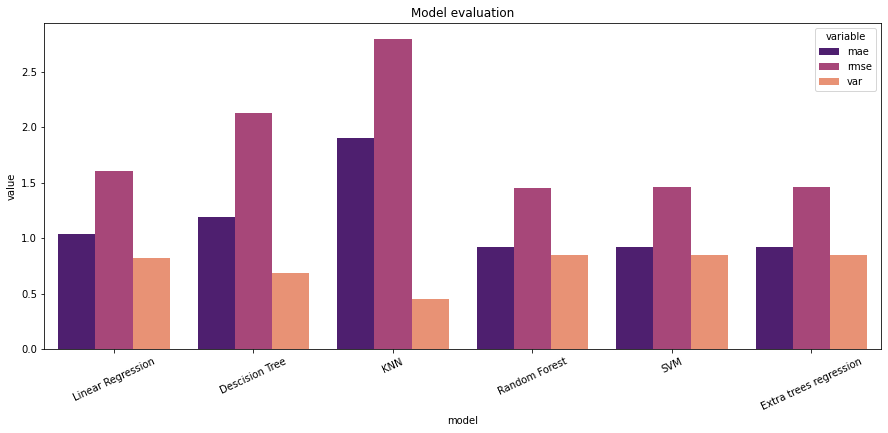

In [242]:
fig, ax = plt.subplots(figsize = (15, 6))
ax = sns.barplot(data=copy_model_evaluation_df , x='model', y='value', hue='variable', palette = 'magma')
ax.set_title("Model evaluation")
plt.xticks(rotation=25)
plt.show()

### Results

After removing columns with weak correlation, it appears that the performance of linear regression and KNN regression has slightly improved. This improvement suggests that removing irrelevant features can help these algorithms focus on the more significant predictors, resulting in more accurate predictions.

However, the performance of SVM and tree-based algorithms, such as Decision Trees and Random Forests, did not show significant improvement. This could be because tree-based algorithms are capable of capturing complex relationships and interactions between variables, including those with weaker correlations. Therefore, removing columns with weak correlation might not have a substantial impact on their performance.

## Conclusion

In conclusion, our exploration of the rare Alcohol and Study dataset has provided valuable insights into the interdependencies and relationships among its features. While we observed that the features do not exhibit a strong correlation at a surface level, further analysis revealed deeper hidden interdependencies.

Moving on to the machine learning aspect of our study, we aimed to predict results using regression and classification techniques. In the regression task, we employed various algorithms such as Linear Regression, Decision Tree, Random Forest, Support Vector Machines (SVM), k-Nearest Neighbors (KNN), and Extra Tree Regression. Among these algorithms, the random forest and SVM yielded the best results - both before and after data clearence.

For the classification task, we applied K-Nearest Neighbors (KNN), Naive Bayes Classifier, Decision Tree, Extra Trees Classifier.algorithms. The analysis demonstrated that the K-Nearest Neighbors (KNN) algorithm outperformed the others, showcasing its efficacy in identifying patterns and grouping instances within the dataset.

By deviating from the commonly studied datasets, we were able to delve into unexplored territory and uncover unique insights. Our findings not only contribute to a deeper understanding of the Alcohol and Study dataset but also highlight the effectiveness of random forest algorithms in both regression and classification tasks.

In addition to our attempts at clusterization k-means algorithm, we also experimented with dimensionality reduction techniques (PCA). However, we did not achieve significant success in this endeavor and deleted the correspording part from our report.

Dimensionality reduction aims to reduce the number of features in a dataset while retaining the important information. This process can be beneficial for visualization and improving the performance of clustering algorithms. Unfortunately, in our analysis of the Alcohol and Study dataset, we did not observe notable improvements or clear patterns emerging from the application of dimensionality reduction techniques.

It is important to note that further research and experimentation may be required to validate and refine our results. Nonetheless, our exploration serves as a valuable starting point for future investigations in this domain.